In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict,RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from mlxtend.plotting import plot_learning_curves

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", None)

In [2]:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

data = pd.read_csv("train.csv", index_col= 0)
data

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [5]:
data.loc[data["Arrival Delay in Minutes"].isna()]

id  Gender      Customer Type  Age   Type of Travel     Class  \
213      49608  Female     Loyal Customer   38  Business travel       Eco   
1124     73442    Male     Loyal Customer   53  Personal Travel       Eco   
1529     71178    Male     Loyal Customer   39  Business travel  Business   
2004     72940  Female  disloyal Customer   26  Business travel  Business   
2108    116374  Female     Loyal Customer   24  Personal Travel       Eco   
...        ...     ...                ...  ...              ...       ...   
102067   36729    Male     Loyal Customer   49  Personal Travel  Eco Plus   
102384   71241    Male     Loyal Customer   58  Business travel       Eco   
102552   27684  Female  disloyal Customer   29  Business travel       Eco   
102960   36787    Male     Loyal Customer   58  Business travel       Eco   
103540   45022  Female     Loyal Customer   33  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
213                 109                      5   
1124               1012                      3   
1529                733                      2   
2004               1035                      3   
2108                417                      2   
...                 ...                    ...   
102067             1249                      2   
102384              733                      3   
102552             1107                      2   
102960             1088                      4   
103540              359                      4   

        Departure/Arrival time convenient  Ease of Online booking  \
213                                     3                       3   
1124                                    2                       3   
1529                                    5                       5   
2004                                    3                       3   
2108                                    1                       2   
...                                   ...                     ...   
102067                                  5                       2   
102384                                  3                       3   
102552                                  1                       1   
102960                                  4                       1   
103540                                  4                       4   

        Gate location  Food and drink  Online boarding  Seat comfort  \
213                 3               5                5             5   
1124                4               4                3             4   
1529                5               2                4             3   
2004                1               2                3             2   
2108                2               5                2             5   
...               ...             ...              ...           ...   
102067              3               2                3             3   
102384              3               3                3             3   
102552              1               5                1             3   
102960              1               5                4             5   
103540              3               4                4             4   

        Inflight entertainment  On-board service  Leg room service  \
213                          5                 5                 2   
1124                         4                 4                 4   
1529                         2                 2                 2   
2004                         2                 3                 3   
2108                         5                 1                 4   
...                        ...               ...               ...   
102067                       3                 4                 5   
102384                       3                 3                 1   
102552                       5                 4                 1   
102960                       5                 1                 5   
103540                

<AxesSubplot:>

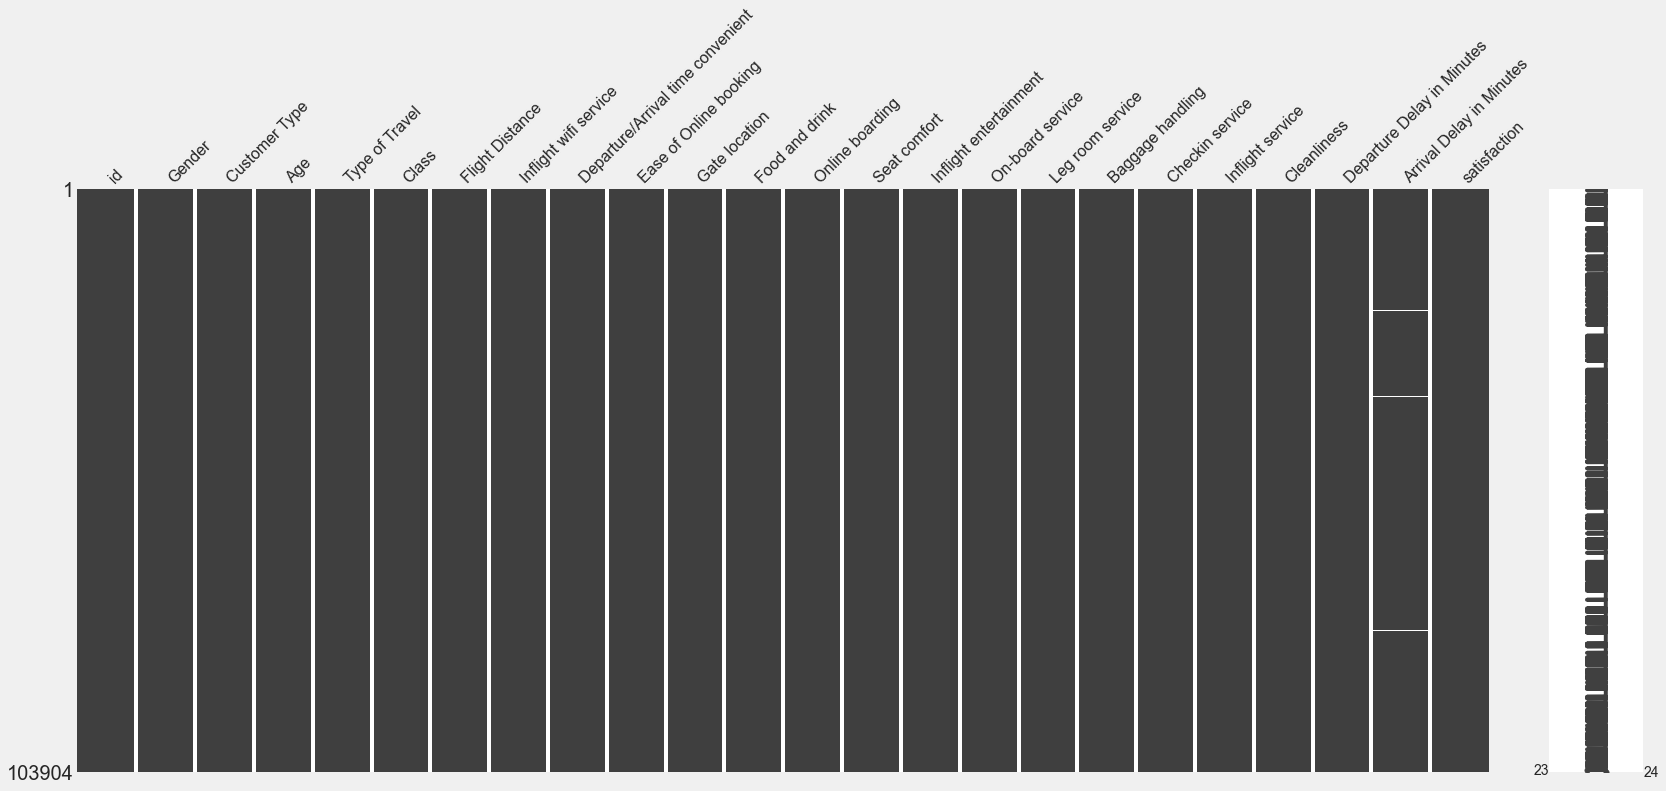

In [6]:
msno.matrix(data)

In [7]:
(data.isna().sum() / len(data)) * 100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [8]:
data.dropna(inplace = True)
data.reset_index(inplace = True, drop = True)

In [9]:
data.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop("id", axis = "columns", inplace = True)

In [12]:
data_eda = data.copy()

In [13]:
data_eda.satisfaction = data_eda.satisfaction.map({"neutral or dissatisfied" : 0, "satisfied" : 1})

In [14]:
data_eda.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [15]:
data_eda.columns = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi service',
       'Departure/Arrival time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

In [16]:
data_eda.head()

Gender      Customer_Type  Age   Type_of_Travel     Class  Flight_Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight_wifi service  Departure/Arrival time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  Gate_location  Food_and_drink  Online_boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat_comfort  Inflight_entertainment  On_board_service  Leg_room_service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  
0                          25                      18.0             0  
1                           1                       6.0             0  
2                           0                       0.0             1  
3                          11                       9.0             0  
4                           0                       0.0             1

In [17]:
data_eda.describe().T

count         mean         std   min  \
Age                                103594.0    39.380466   15.113125   7.0   
Flight_Distance                    103594.0  1189.325202  997.297235  31.0   
Inflight_wifi service              103594.0     2.729753    1.327866   0.0   
Departure/Arrival time_convenient  103594.0     3.060081    1.525233   0.0   
Ease_of_Online_booking             103594.0     2.756984    1.398934   0.0   
Gate_location                      103594.0     2.977026    1.277723   0.0   
Food_and_drink                     103594.0     3.202126    1.329401   0.0   
Online_boarding                    103594.0     3.250497    1.349433   0.0   
Seat_comfort                       103594.0     3.439765    1.318896   0.0   
Inflight_entertainment             103594.0     3.358341    1.333030   0.0   
On_board_service                   103594.0     3.382609    1.288284   0.0   
Leg_room_service                   103594.0     3.351401    1.315409   0.0   
Baggage_handling                   103594.0     3.631687    1.181051   1.0   
Checkin_service                    103594.0     3.304323    1.265396   0.0   
Inflight_service                   103594.0     3.640761    1.175603   0.0   
Cleanliness                        103594.0     3.286397    1.312194   0.0   
Departure_Delay_in_Minutes         103594.0    14.747939   38.116737   0.0   
Arrival_Delay_in_Minutes           103594.0    15.178678   38.698682   0.0   
satisfaction                       103594.0     0.433394    0.495546   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight_Distance                    414.0  842.0  1743.0  4983.0  
Inflight_wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time_convenient    2.0    3.0     4.0     5.0  
Ease_of_Online_booking               2.0    3.0     4.0     5.0  
Gate_location                        2.0    3.0     4.0     5.0  
Food_and_drink                       2.0    3.0     4.0     5.0  
Online_boarding                      2.0    3.0     4.0     5.0  
Seat_comfort                         2.0    4.0     5.0     5.0  
Inflight_entertainment               2.0    4.0     4.0     5.0  
On_board_service                     2.0    4.0     4.0     5.0  
Leg_room_service                     2.0    4.0     4.0     5.0  
Baggage_handling                     3.0    4.0     5.0     5.0  
Checkin_service                      3.0    3.0     4.0     5.0  
Inflight_service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure_Delay_in_Minutes           0.0    0.0    12.0  1592.0  
Arrival_Delay_in_Minutes             0.0    0.0    13.0  1584.0  
satisfaction                         0.0    0.0     1.0     1.0

In [18]:
cat_data = data_eda.select_dtypes("O")
num_data = data_eda.select_dtypes(["int64", "float64"])
discrete_data = data_eda.iloc[:, [2, 5, -2, -3]]
ordinal_data = data_eda.iloc[:, 6:20]

In [200]:
# nilai dalam cat data

for kolom in cat_data.columns:
    print(f"value pada kolom {kolom} ada : \n{cat_data[kolom].value_counts()}\n")

value pada kolom Gender ada : 
Female    52576
Male      51018
Name: Gender, dtype: int64

value pada kolom Customer_Type ada : 
Loyal Customer       84662
disloyal Customer    18932
Name: Customer_Type, dtype: int64

value pada kolom Type_of_Travel ada : 
Business travel    71465
Personal Travel    32129
Name: Type_of_Travel, dtype: int64

value pada kolom Class ada : 
Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64



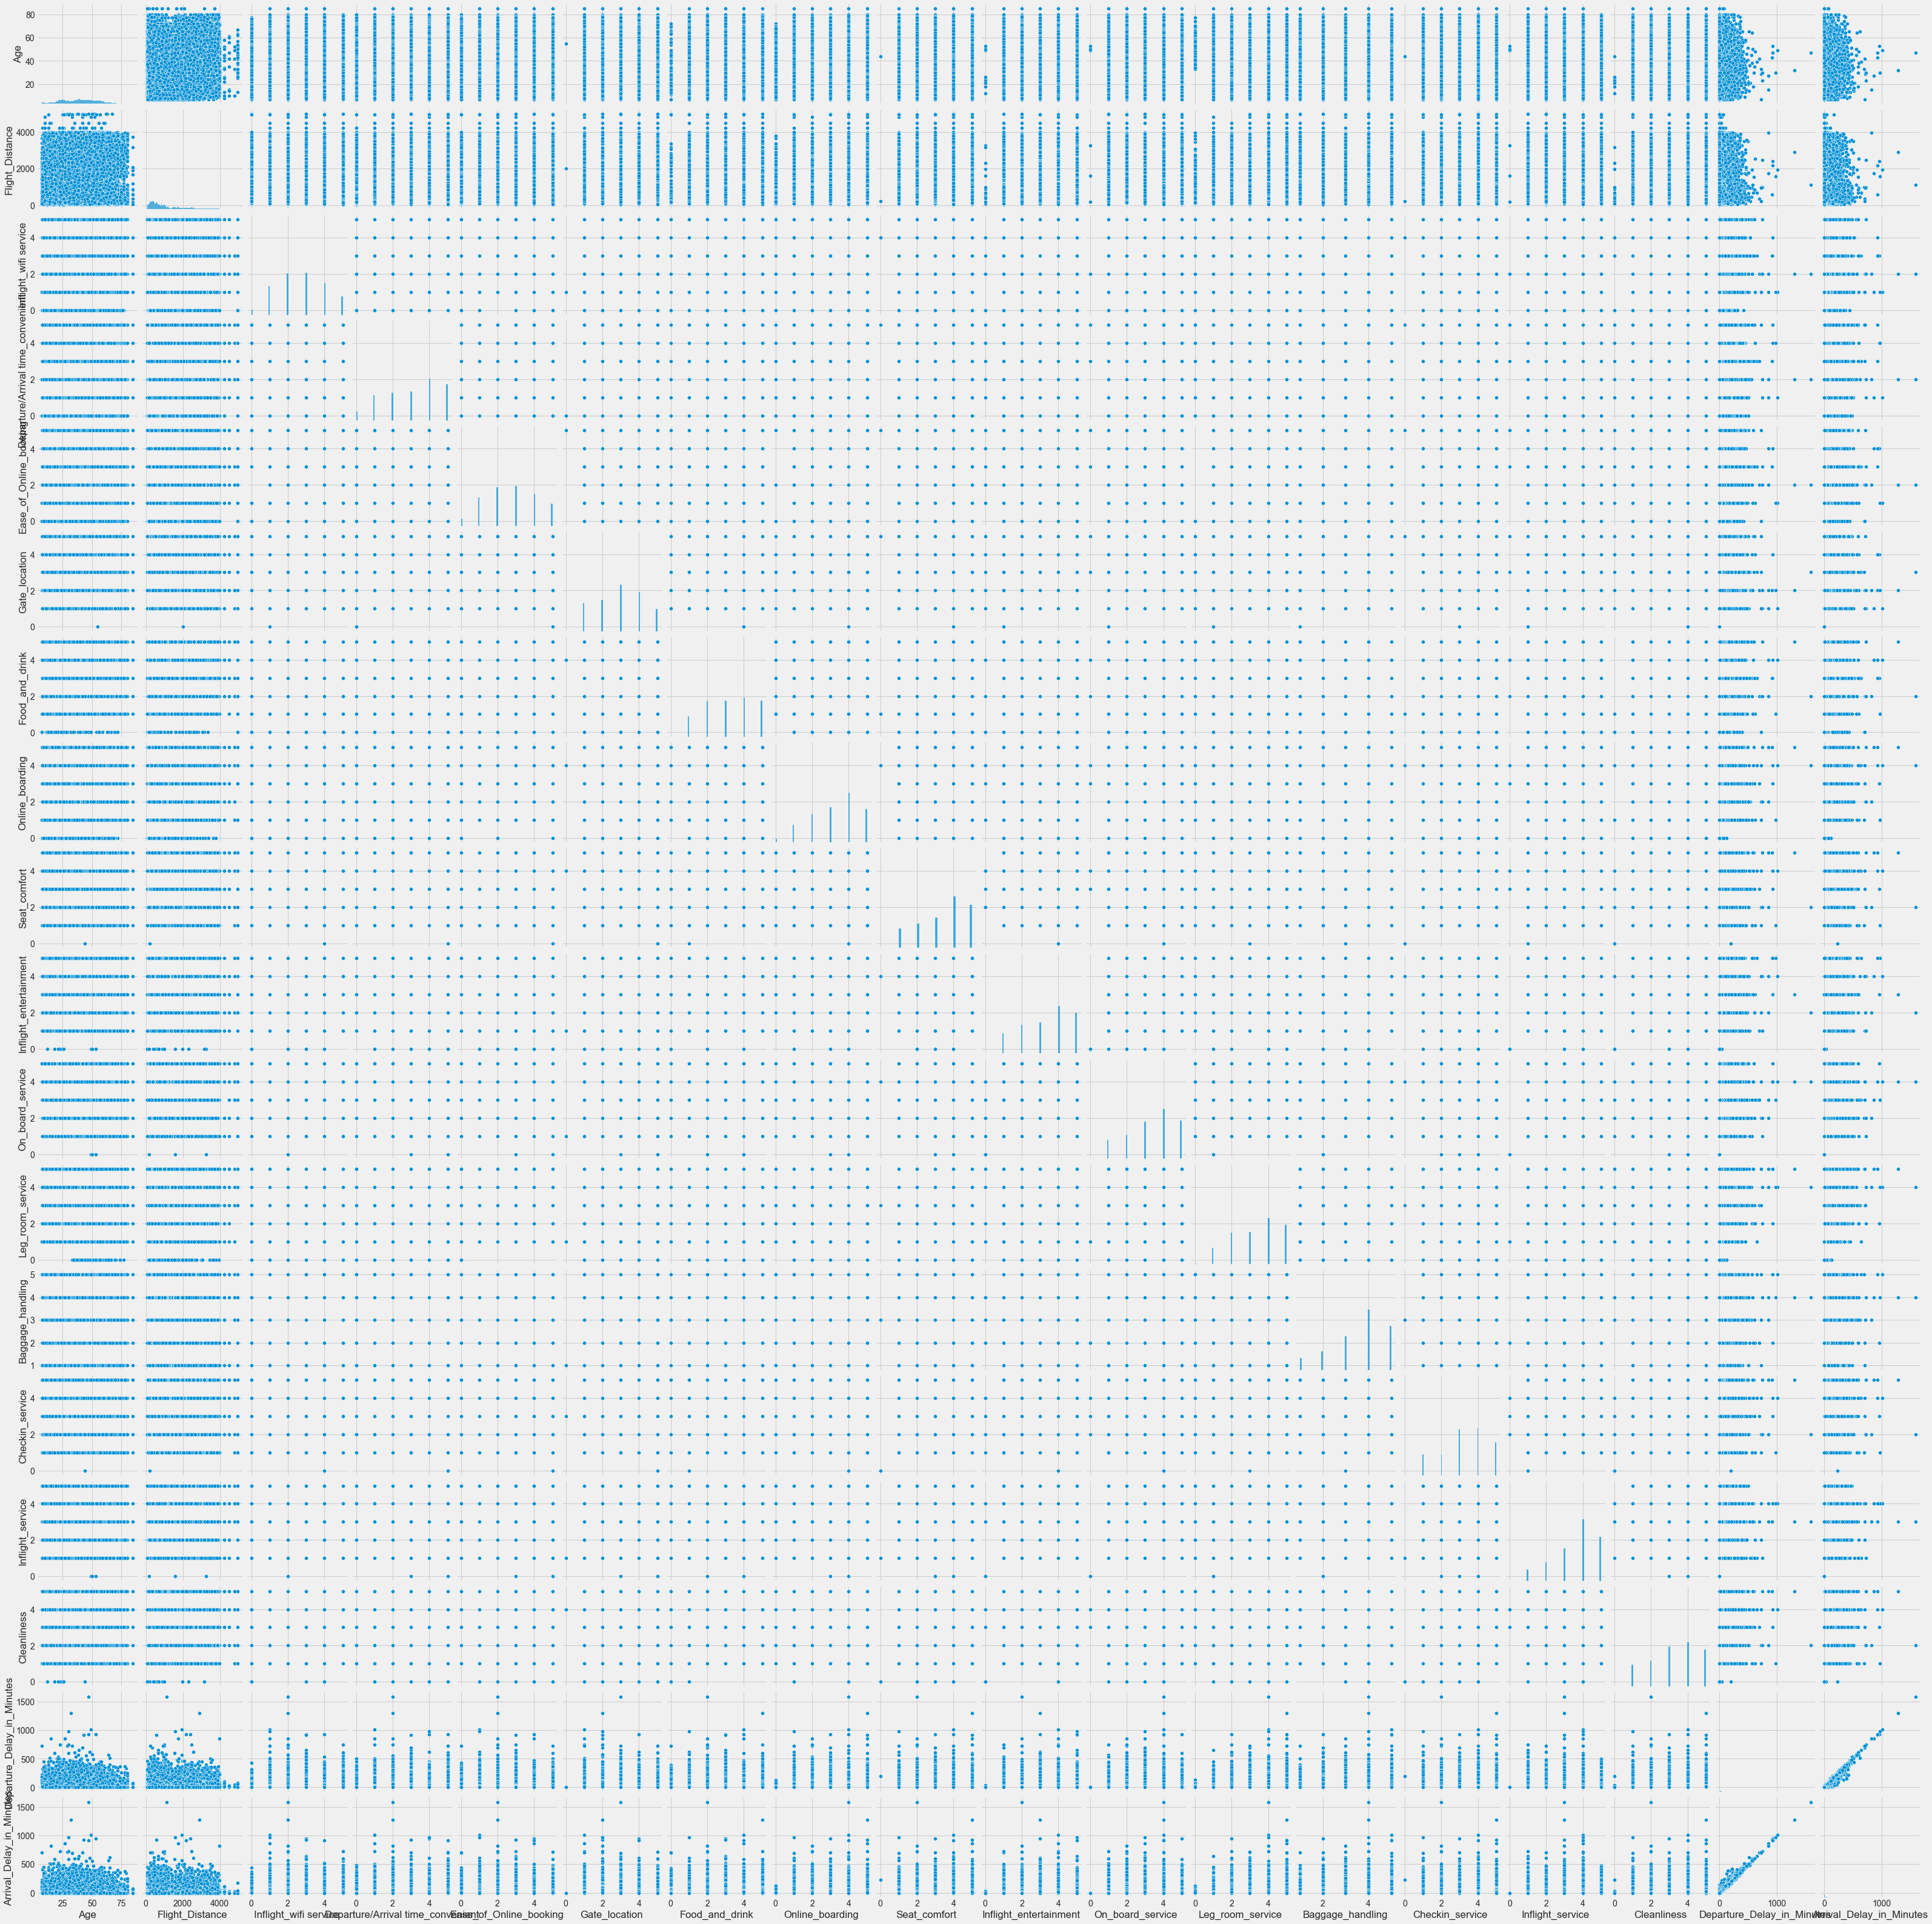

In [18]:
sns.pairplot(data_eda)

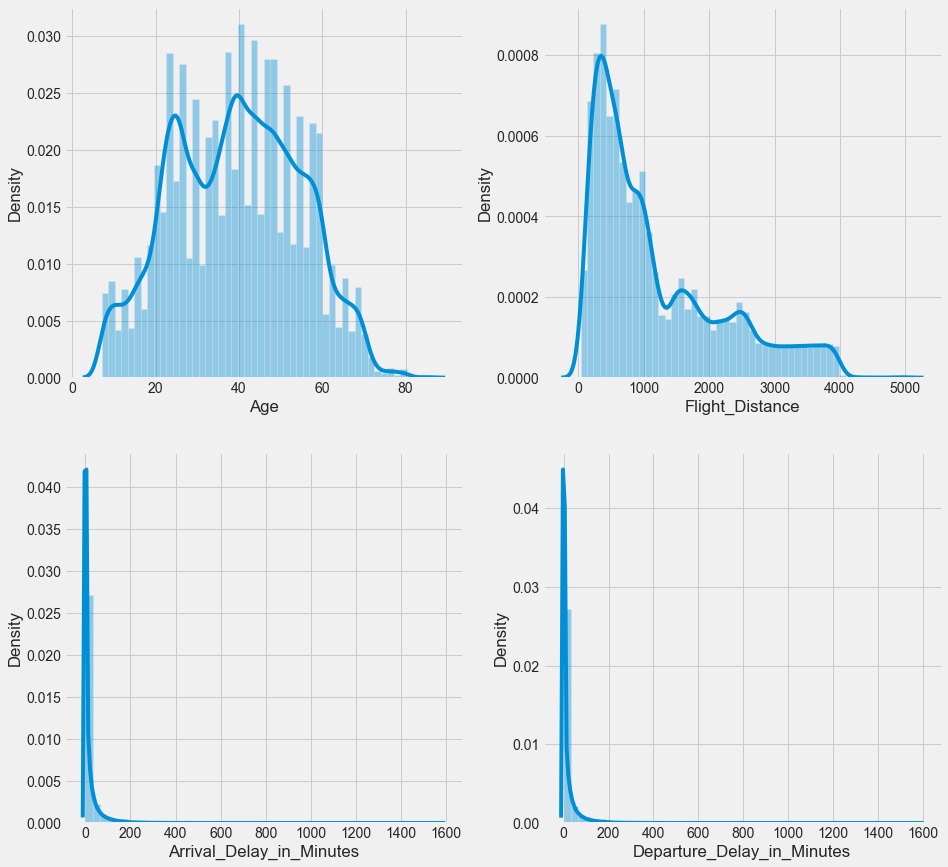

In [149]:
fig, axes = plt.subplots(2, 2, figsize = (14, 14))

for i, ax in enumerate(fig.axes):
    kolom = discrete_data.columns[i]
    sns.distplot(data_eda[kolom], ax=ax)

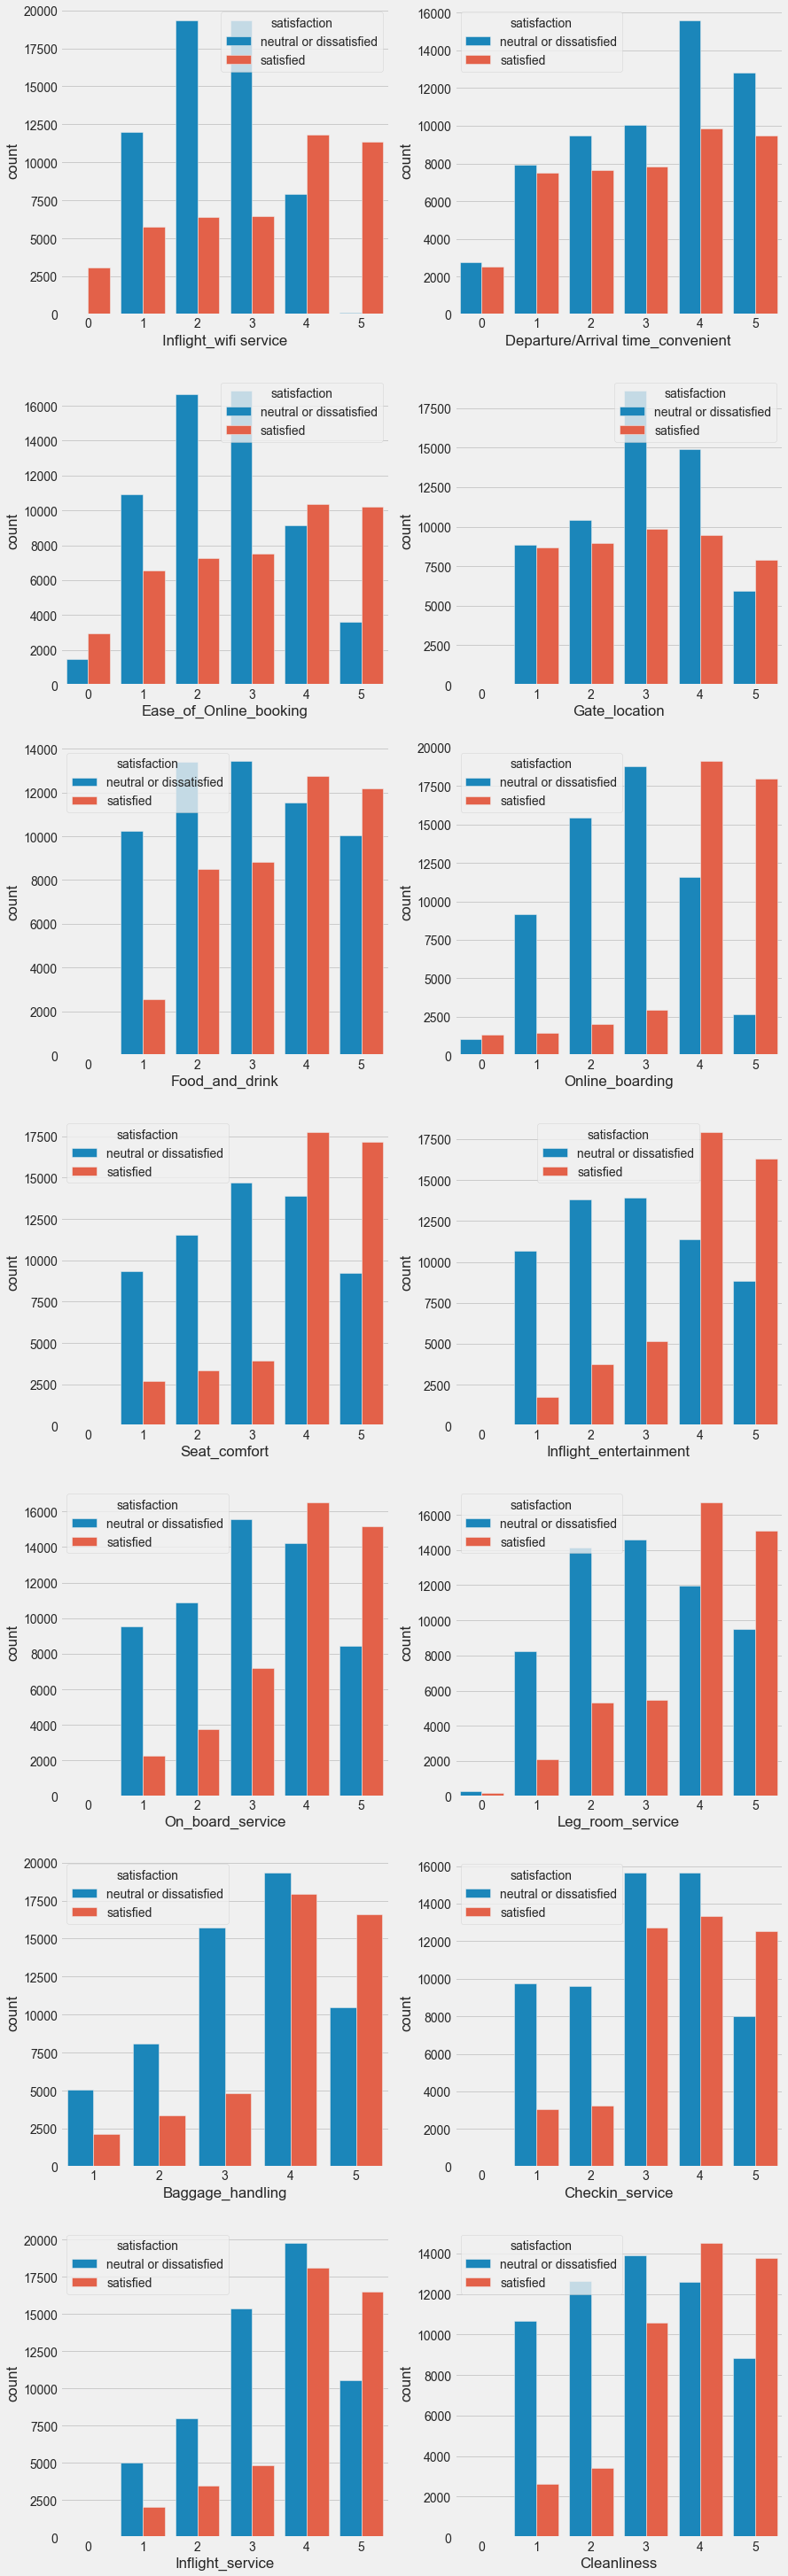

In [20]:
fig, axes = plt.subplots(7, 2, figsize = (13, 49))

for i, ax in enumerate(fig.axes):
    kolom = ordinal_data.columns[i]
    sns.countplot(data[kolom], ax = ax,
                  hue = data.satisfaction)

Text(0, 0.5, 'Delay Kedatangan')

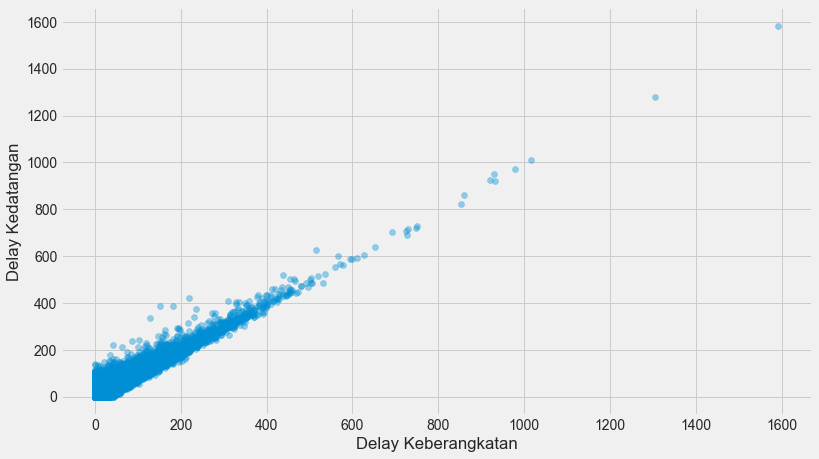

In [21]:
plt.figure(figsize = (12, 7))
plt.scatter(data = data_eda, x = "Departure_Delay_in_Minutes", y = "Arrival_Delay_in_Minutes", alpha= 0.4)
plt.xlabel("Delay Keberangkatan")
plt.ylabel("Delay Kedatangan")

<AxesSubplot:xlabel='Gender', ylabel='Age'>

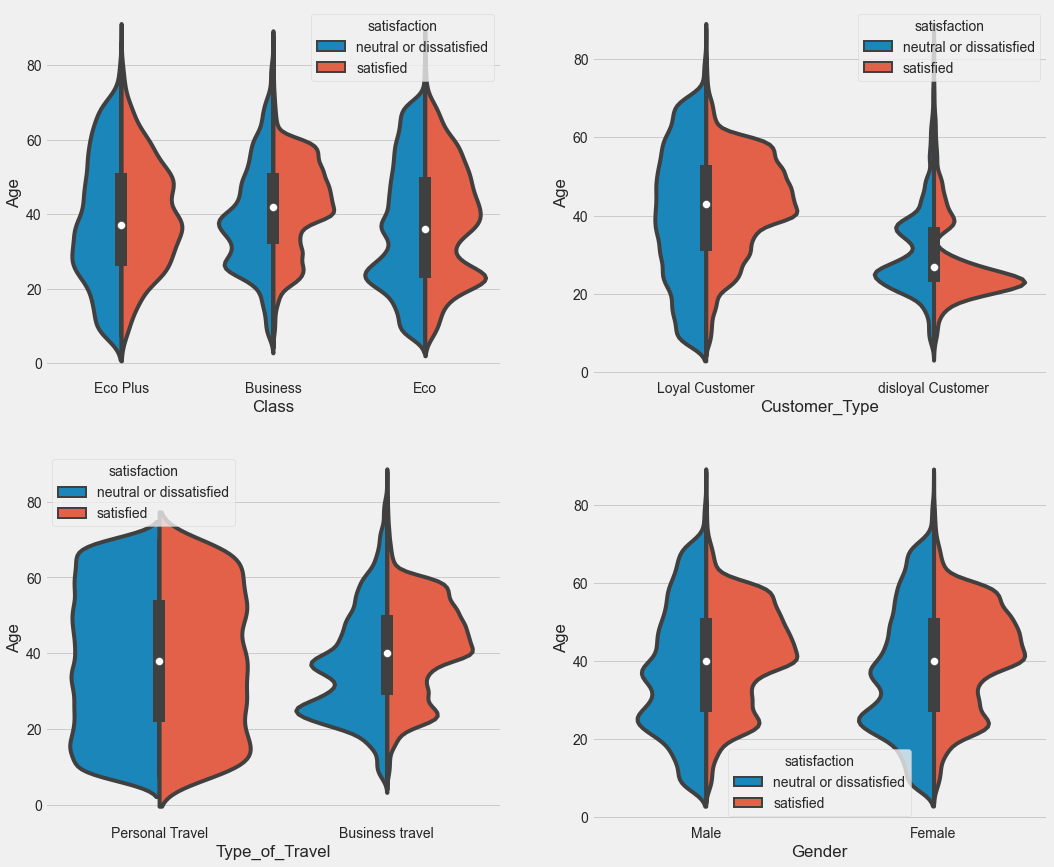

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (16,14))

#plt.figure(figsize = (12, 7))
sns.violinplot(x = data_eda.Class, y = data_eda.Age, hue = data_eda.satisfaction, split= True, ax = axes[0][0])

sns.violinplot(x = data_eda.Type_of_Travel, y = data_eda.Age, hue = data_eda.satisfaction, split= True, ax = axes[1][0])

sns.violinplot(x = data_eda.Customer_Type, y = data_eda.Age, hue = data_eda.satisfaction, split= True, ax = axes[0][1])

sns.violinplot(x = data_eda.Gender, y = data_eda.Age, hue = data_eda.satisfaction, split= True, ax = axes[1][1])

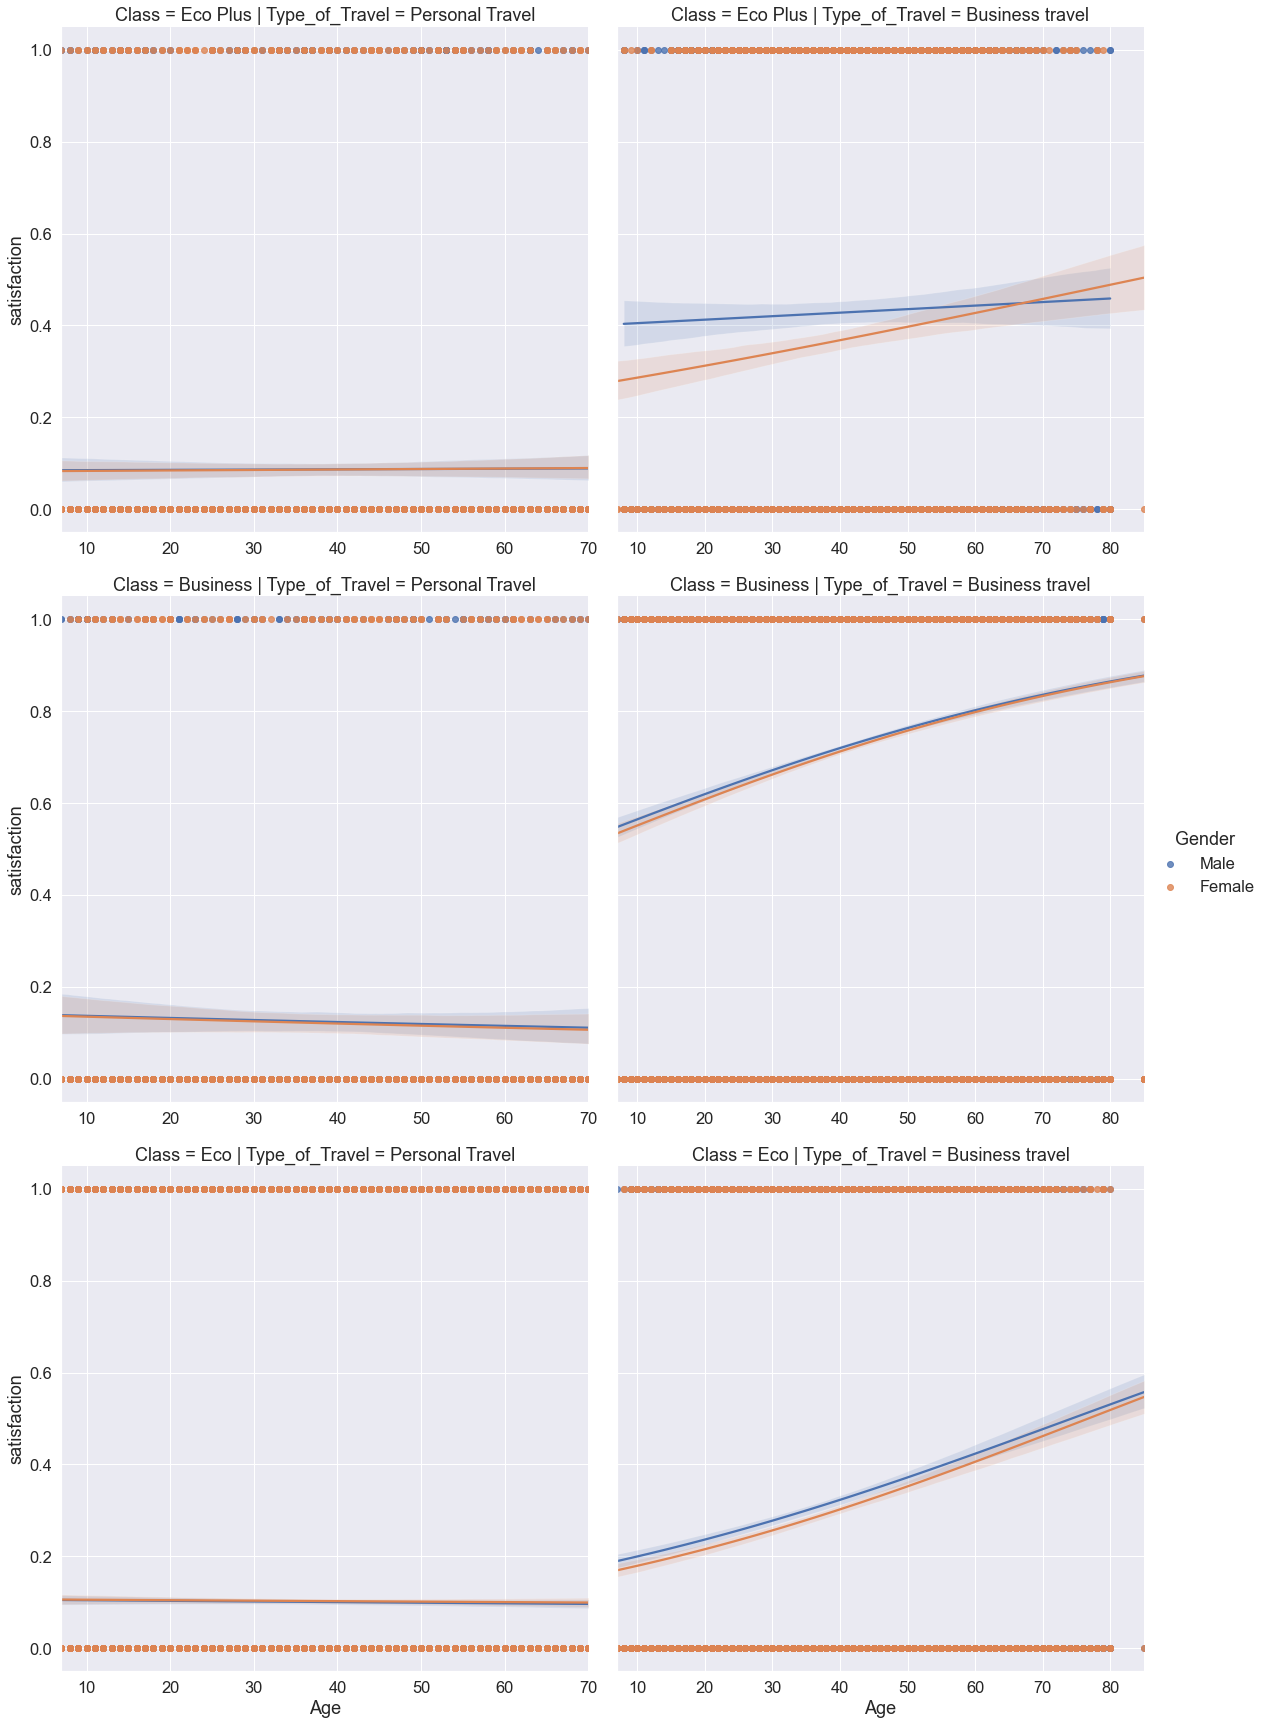

In [144]:
sns.set(font_scale = 1.5)
sns.lmplot(data = data_eda, x = "Age", y = "satisfaction",
           logistic= True, row= "Class", col = "Type_of_Travel",
           hue = "Gender", height= 8, sharex= False)

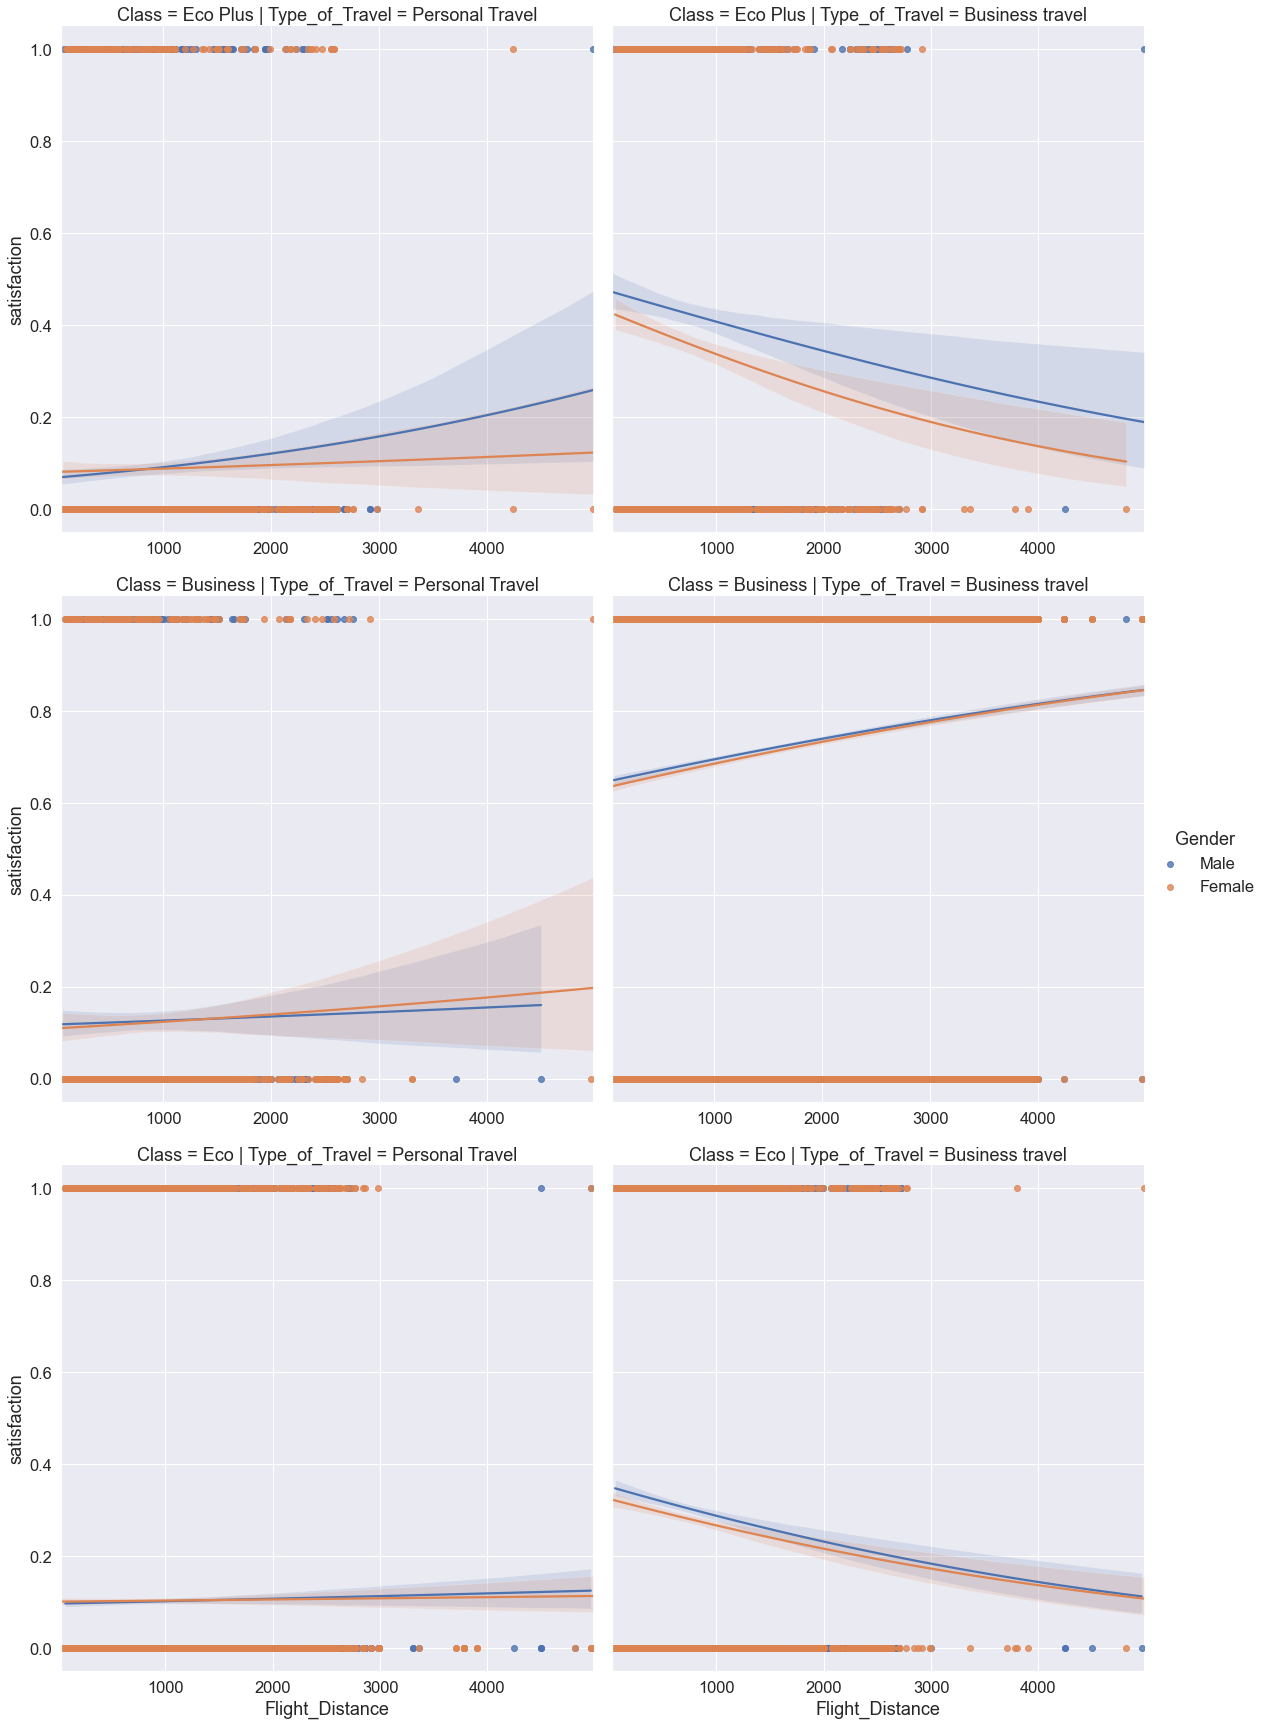

In [146]:
sns.set(font_scale = 1.5)
sns.lmplot(data = data_eda, x = "Flight_Distance", y = "satisfaction",
           logistic= True, row= "Class", col = "Type_of_Travel",
           hue = "Gender", height= 8, sharex= False)

In [55]:
data_eda.head()

Gender      Customer_Type  Age   Type_of_Travel     Class  Flight_Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight_wifi service  Departure/Arrival time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  Gate_location  Food_and_drink  Online_boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat_comfort  Inflight_entertainment  On_board_service  Leg_room_service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  
0                          25                      18.0             0  
1                           1                       6.0             0  
2                           0                       0.0             1  
3                          11                       9.0             0  
4                           0                       0.0             1

In [275]:
data_eda.groupby("satisfaction").mean().T

satisfaction                                0            1
Age                                 37.569126    41.748558
Flight_Distance                    928.607084  1530.180302
Inflight_wifi service                2.399748     3.161191
Departure/Arrival time_convenient    3.129070     2.969887
Ease_of_Online_booking               2.547149     3.031316
Gate_location                        2.976524     2.977682
Food_and_drink                       2.958362     3.520814
Online_boarding                      2.656337     4.027285
Seat_comfort                         3.037072     3.966234
Inflight_entertainment               2.894100     3.965276
On_board_service                     3.019303     3.857585
Leg_room_service                     2.991107     3.822438
Baggage_handling                     3.375709     3.966345
Checkin_service                      3.043239     3.645656
Inflight_service                     3.389015     3.969887
Cleanliness                          2.936317     3.744081
Departure_Delay_in_Minutes          16.431913    12.546362
Arrival_Delay_in_Minutes            17.127536    12.630799

In [276]:
data_eda.groupby("Customer_Type").mean().T

Customer_Type                      Loyal Customer  disloyal Customer
Age                                     41.394557          30.373653
Flight_Distance                       1295.607096         714.043260
Inflight_wifi service                    2.734592           2.708113
Departure/Arrival time_convenient        3.209386           2.392404
Ease_of_Online_booking                   2.769968           2.698922
Gate_location                            2.973223           2.994031
Food_and_drink                           3.239564           3.034703
Online_boarding                          3.371406           2.709804
Seat_comfort                             3.539380           2.994295
Inflight_entertainment                   3.427748           3.047961
On_board_service                         3.416952           3.229030
Leg_room_service                         3.381139           3.218413
Baggage_handling                         3.617786           3.693852
Checkin_service                          3.323510           3.218519
Inflight_service                         3.627944           3.698077
Cleanliness                              3.338369           3.053983
Departure_Delay_in_Minutes              14.669911          15.096873
Arrival_Delay_in_Minutes                15.091800          15.567188
satisfaction                             0.477345           0.236848

In [279]:
data_eda.groupby("Gender").mean().T

Gender                                  Female         Male
Age                                  39.247661    39.517327
Flight_Distance                    1183.352689  1195.480105
Inflight_wifi service                 2.718027     2.741836
Departure/Arrival time_convenient     3.046789     3.073778
Ease_of_Online_booking                2.747109     2.767161
Gate_location                         2.976757     2.977302
Food_and_drink                        3.194652     3.209828
Online_boarding                       3.306528     3.192755
Seat_comfort                          3.474380     3.404093
Inflight_entertainment                3.350369     3.366557
On_board_service                      3.372432     3.393097
Leg_room_service                      3.310142     3.393920
Baggage_handling                      3.588253     3.676448
Checkin_service                       3.291312     3.317731
Inflight_service                      3.595671     3.687228
Cleanliness                           3.278074     3.294974
Departure_Delay_in_Minutes           14.652807    14.845976
Arrival_Delay_in_Minutes             15.163592    15.194226
satisfaction                          0.427362     0.439610

In [281]:
data_eda.groupby("Type_of_Travel").mean().T

Type_of_Travel                     Business travel  Personal Travel
Age                                      39.872875        38.285194
Flight_Distance                        1368.294872       791.240375
Inflight_wifi service                     2.823130         2.522052
Departure/Arrival time_convenient         2.794361         3.651125
Ease_of_Online_booking                    2.882110         2.478664
Gate_location                             3.003414         2.918329
Food_and_drink                            3.258392         3.076971
Online_boarding                           3.453733         2.798438
Seat_comfort                              3.549416         3.195867
Inflight_entertainment                    3.490604         3.064148
On_board_service                          3.431386         3.274114
Leg_room_service                          3.473714         3.079336
Baggage_handling                          3.656517         3.576457
Checkin_service                           3.289862         3.336487
Inflight_service                          3.658490         3.601326
Cleanliness                               3.355699         3.132248
Departure_Delay_in_Minutes               14.902470        14.404214
Arrival_Delay_in_Minutes                 15.326146        14.850665
satisfaction                              0.582579         0.101559

In [283]:
data_eda.groupby("Class").mean().T

Class                                 Business         Eco    Eco Plus
Age                                  41.575374   37.162986   38.657204
Flight_Distance                    1676.078493  742.843281  746.446438
Inflight_wifi service                 2.775221    2.675316    2.767809
Departure/Arrival time_convenient     2.905820    3.199043    3.216256
Ease_of_Online_booking                2.914077    2.605091    2.662694
Gate_location                         2.983042    2.972228    2.967059
Food_and_drink                        3.322835    3.086451    3.123192
Online_boarding                       3.716411    2.812933    2.890198
Seat_comfort                          3.760786    3.139399    3.184521
Inflight_entertainment                3.635395    3.098470    3.142073
On_board_service                      3.679608    3.120834    3.045929
Leg_room_service                      3.644661    3.086129    3.061328
Baggage_handling                      3.842812    3.450153    3.363953
Checkin_service                       3.518987    3.122250    3.016470
Inflight_service                      3.844447    3.464791    3.387654
Cleanliness                           3.477439    3.108278    3.130557
Departure_Delay_in_Minutes           14.335554   15.093147   15.329405
Arrival_Delay_in_Minutes             14.577272   15.672183   16.088645
satisfaction                          0.694285    0.186101    0.245849

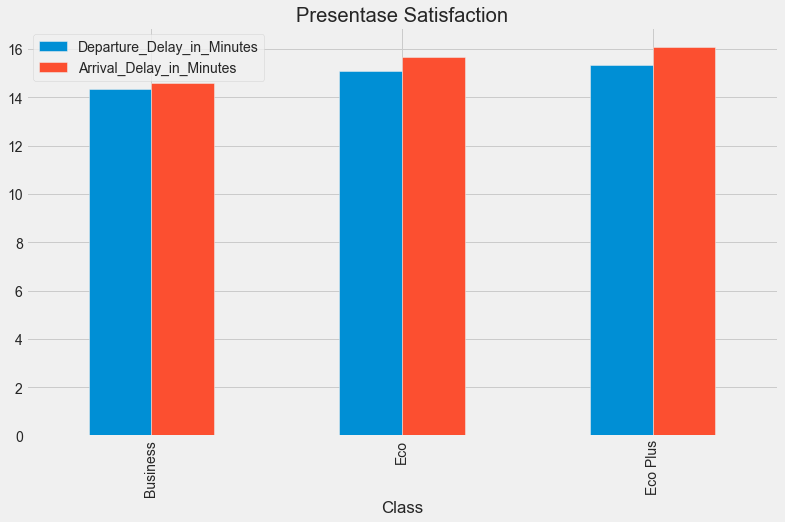

In [219]:
data_eda.groupby(["Class"])["Departure_Delay_in_Minutes", 
                            "Arrival_Delay_in_Minutes"].mean().round(2).plot(kind = "bar",
                                                                            figsize = (12, 7),
                                                                            title = "Presentase Satisfaction")

plt.show()

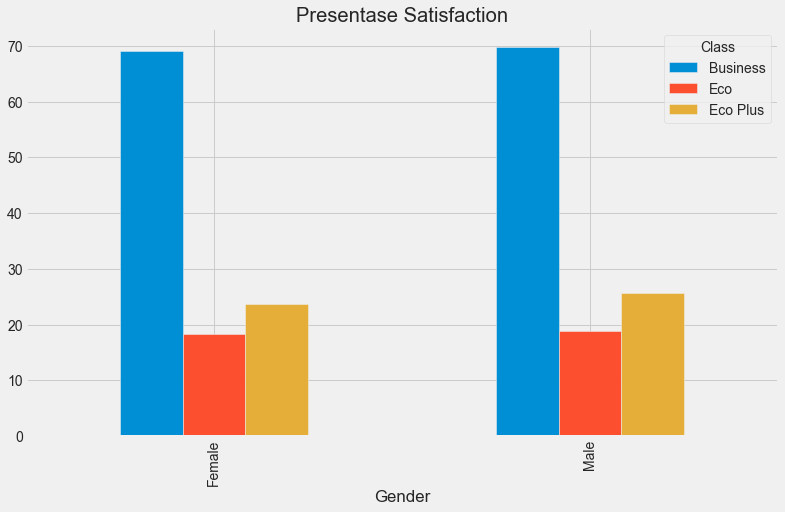

In [218]:
(data_eda.groupby(["Gender", "Class"]).satisfaction.mean().unstack() * 100).round(2).plot(kind = "bar", 
                                                                                          figsize = (12, 7),
                                                                                        title = "Presentase Satisfaction")
plt.show()

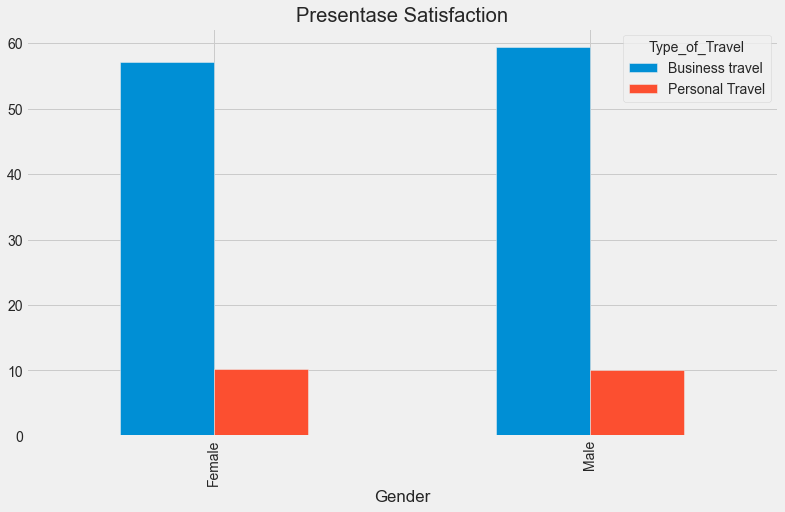

In [220]:
(data_eda.groupby(["Gender", 
                   "Type_of_Travel"]).satisfaction.mean().unstack() * 100).round(2).plot(kind = "bar",
                                                                                         figsize = (12, 7),
                                                                                         title = "Presentase Satisfaction")

plt.show()

<AxesSubplot:title={'center':'Presentase Jumlah Pengguna Class'}, xlabel='Type_of_Travel'>

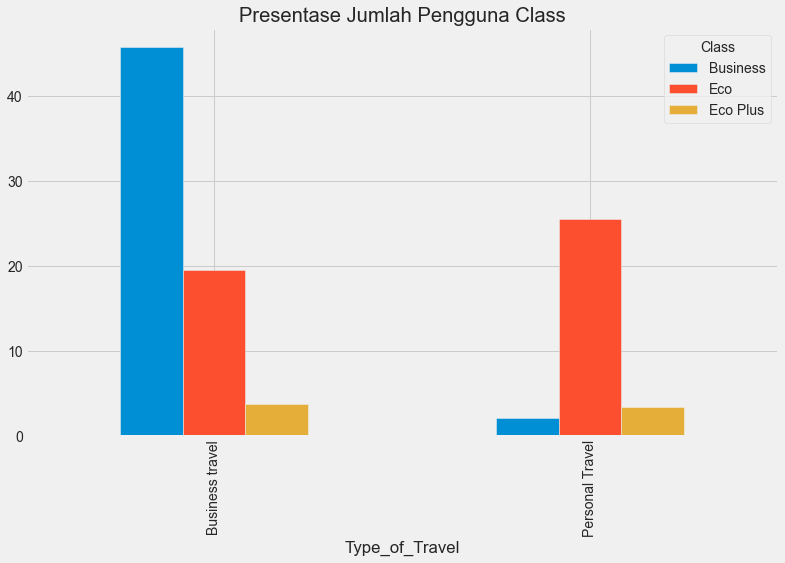

In [239]:
(data_eda.groupby(["Type_of_Travel", 
                   "Class"]).Class.count().unstack() / len(data_eda) * 100).round(2).plot(kind = "bar", figsize = (12, 7),
                                                                                          title = "Presentase Jumlah Pengguna Class")

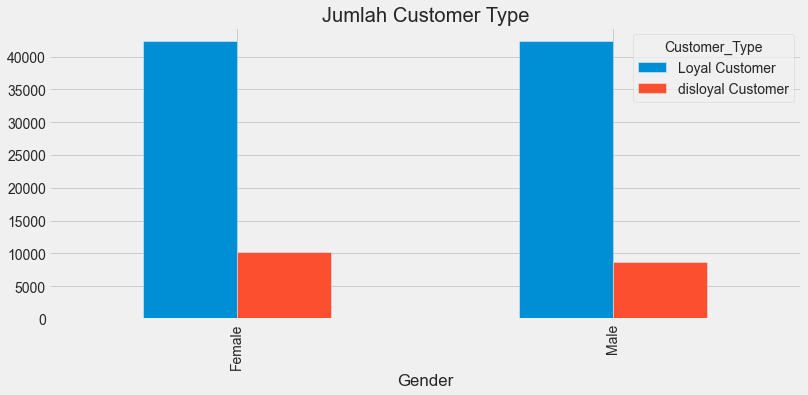

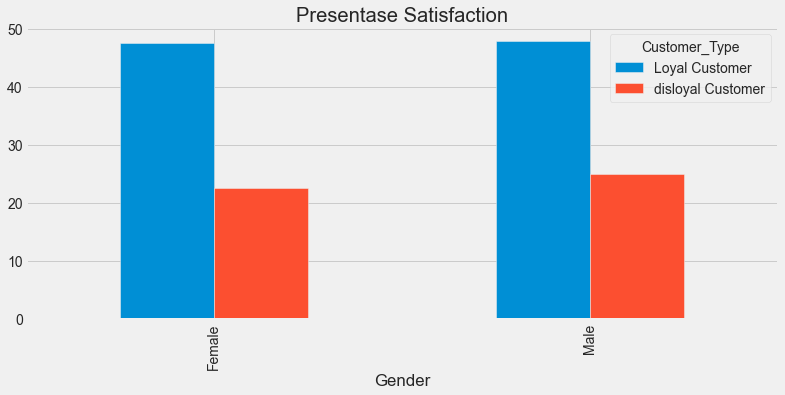

In [259]:
(data_eda.groupby(["Gender", 
                   "Customer_Type"]).Customer_Type.count().unstack()).round(2).plot(kind = "bar",
                                                                                                   figsize = (12, 5),
                                                                                    title = "Jumlah Customer Type"
                                                                                    )


(data_eda.groupby(["Gender", 
                   "Customer_Type"]).satisfaction.mean().unstack() * 100).round(2).plot(kind = "bar",
                                                                                                   figsize = (12, 5),
                                                                                        title = "Presentase Satisfaction"
                                                                                        )



plt.show()

<AxesSubplot:title={'center':'Presentase Satisfaction'}, xlabel='Customer_Type'>

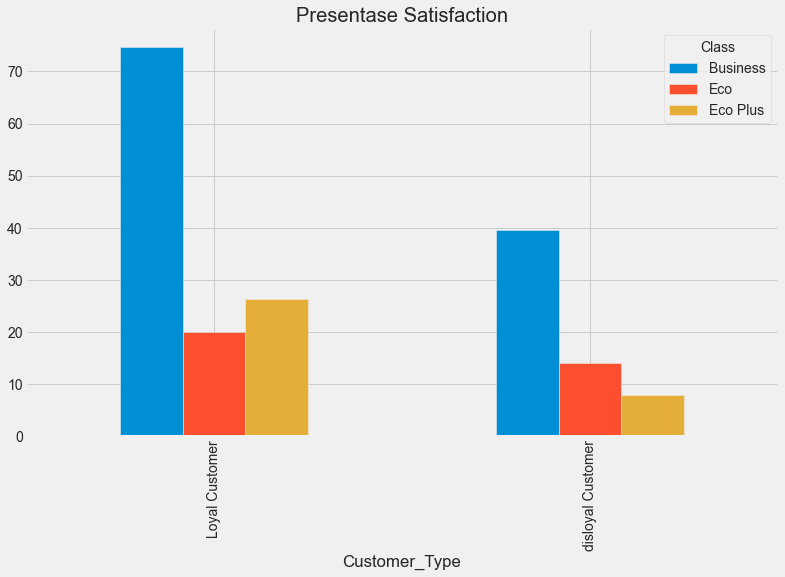

In [226]:
(data_eda.groupby(["Customer_Type", 
                   "Class"]).satisfaction.mean().unstack() * 100).round(2).plot(kind = "bar", figsize = (12, 7),
                                                                                title = "Presentase Satisfaction")

In [173]:
# tambah kolom binning lama delay dan kedatangan dan kolom 

data_eda["cat_umur"] = pd.cut(data_eda.Age, bins= [0, 16, 25, 59, 100], labels= ["anak", "remaja", "dewasa", "lansia"])
data_eda["cat_jarak"] = pd.qcut(data_eda.Flight_Distance, q= [0, 0.2, 0.6 , 0.85, 1], labels= ["dekat", "normal",
                                                                                          "lumayan", "jauh"])
data_eda.head()

Gender      Customer_Type  Age   Type_of_Travel     Class  Flight_Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight_wifi service  Departure/Arrival time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease_of_Online_booking  Gate_location  Food_and_drink  Online_boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat_comfort  Inflight_entertainment  On_board_service  Leg_room_service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage_handling  Checkin_service  Inflight_service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  satisfaction  \
0                          25                      18.0             0   
1                           1                       6.0             0   
2                           0                       0.0             1   
3                          11                       9.0             0   
4                           0                       0.0             1   

  cat_umur cat_jarak  
0     anak    normal  
1   remaja     dekat  
2   dewasa   lumayan  
3   remaja    normal  
4   lansia     dekat

In [174]:
print(f"Rincian Data kategori umur :\n{data_eda.cat_umur.value_counts()} \n")
print(f"Rincian Data kategori Jarak :\n{data_eda.cat_jarak.value_counts()} \n")

Rincian Data kategori umur :
dewasa    71366
remaja    15626
lansia     9682
anak       6920
Name: cat_umur, dtype: int64 

Rincian Data kategori Jarak :
normal     41491
lumayan    25777
dekat      20792
jauh       15534
Name: cat_jarak, dtype: int64 



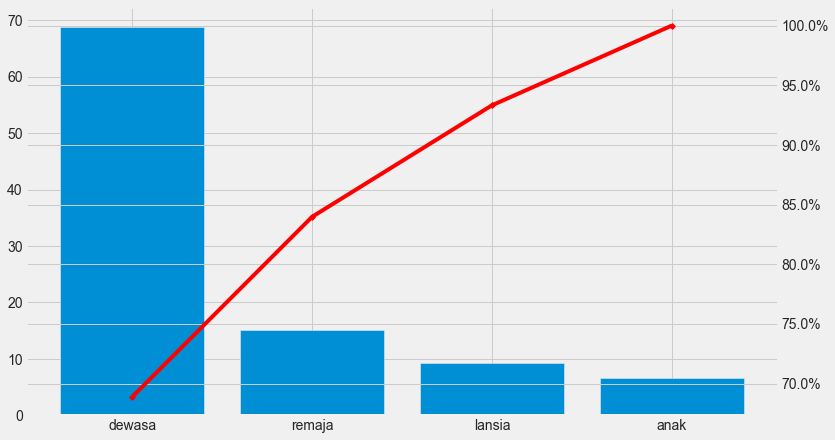

In [214]:
from matplotlib.ticker import PercentFormatter

umur = (data_eda.cat_umur.value_counts() / len(data_eda) * 100).to_frame()

fig, ax = plt.subplots(figsize = (12, 7))

ax.bar(umur.index, umur.cat_umur)

ax2 = ax.twinx()
ax2.plot(umur.index, umur.cumsum(), color = "red", marker = "D", ms = 4)
ax2.yaxis.set_major_formatter(PercentFormatter())

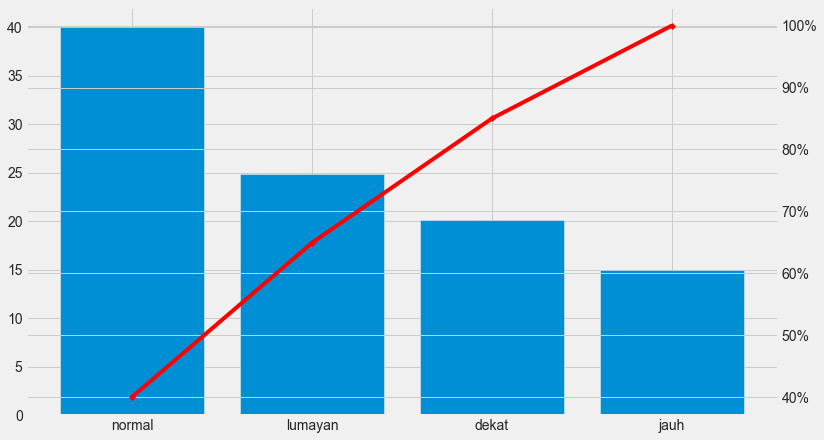

In [216]:
fig, ax = plt.subplots(figsize = (12, 7))

jarak = (data_eda.cat_jarak.value_counts() / len(data_eda) * 100).to_frame()

ax.bar(jarak.index, jarak.cat_jarak)

ax2 = ax.twinx()
ax2.plot(jarak.index, jarak.cumsum(), marker = "D", color = "red", ms = 4)
ax2.yaxis.set_major_formatter(PercentFormatter())

<AxesSubplot:xlabel='Type_of_Travel'>

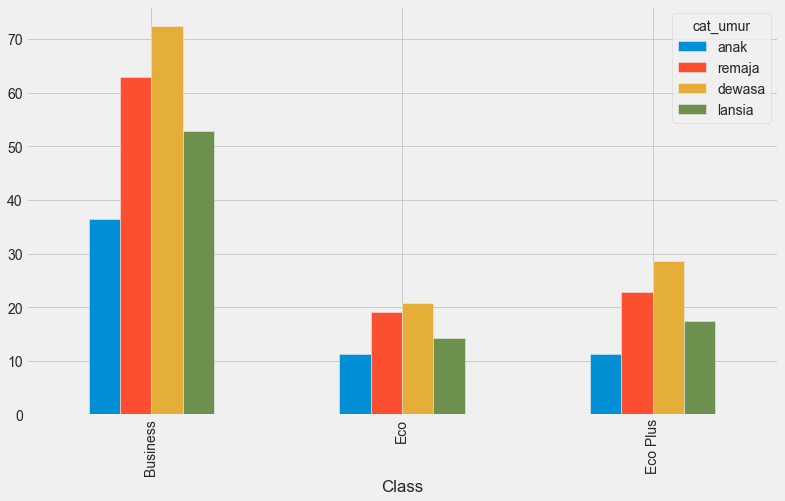

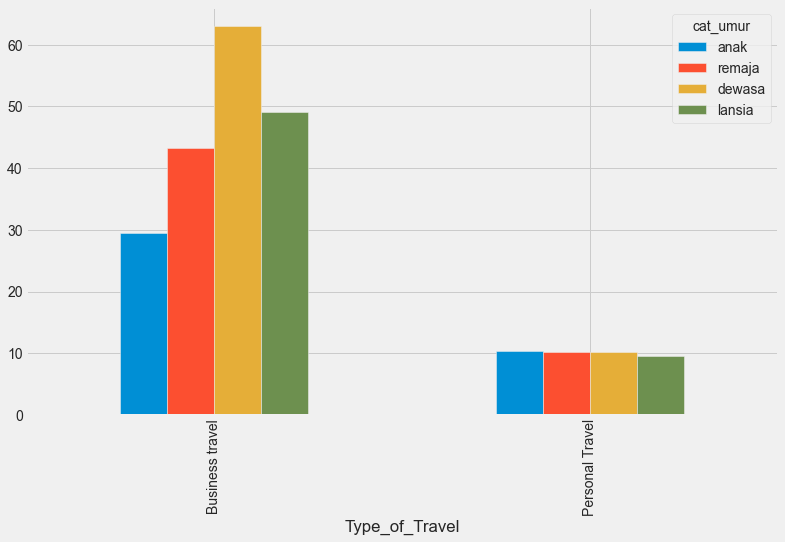

In [254]:
(data_eda.groupby(["Class", "cat_umur"]).satisfaction.mean().unstack() * 100).round(2).plot(kind ="bar",
                                                                                             figsize = (12, 7))

(data_eda.groupby(["Type_of_Travel", "cat_umur"]).satisfaction.mean().unstack() * 100).round(2).plot(kind ="bar",
                                                                                             figsize = (12, 7))

In [112]:
(data_eda.groupby(["Gender", "cat_jarak"]).satisfaction.mean().to_frame() * 100).round(2)

satisfaction
Gender cat_jarak              
Female dekat             33.31
       normal            32.13
       lumayan           50.42
       jauh              71.43
Male   dekat             34.62
       normal            32.80
       lumayan           52.11
       jauh              72.25

In [151]:
(data_eda.groupby(["Gender", "cat_jarak", "cat_umur"]).satisfaction.mean().to_frame() * 100).round(2)

satisfaction
Gender cat_jarak cat_umur              
Female dekat     anak             10.85
                 remaja           27.56
                 dewasa           38.42
                 lansia           25.36
       normal    anak             12.95
                 remaja           30.51
                 dewasa           37.17
                 lansia           18.81
       lumayan   anak             18.73
                 remaja           36.48
                 dewasa           58.34
                 lansia           30.33
       jauh      anak             27.73
                 remaja           54.83
                 dewasa           76.27
                 lansia           52.25
Male   dekat     anak             10.17
                 remaja           27.05
                 dewasa           40.14
                 lansia           27.13
       normal    anak             14.72
                 remaja           30.56
                 dewasa           37.82
                 lansia           20.43
       lumayan   anak             20.55
                 remaja           41.48
                 dewasa           59.57
                 lansia           26.26
       jauh      anak             24.73
                 remaja           60.07
                 dewasa           76.13
                 lansia           54.89

<AxesSubplot:>

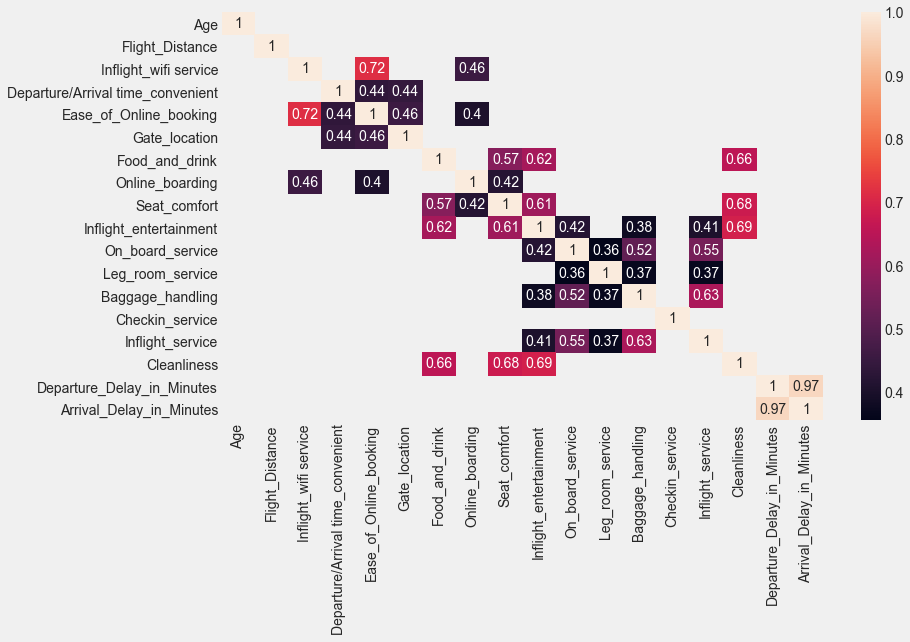

In [24]:
plt.figure(figsize = (12, 7))
corr = data.corr()
mask1 = corr < -.35
mask2 = corr > .35

sns.heatmap(corr[mask1 | mask2], annot = True)

In [168]:
VIF = pd.DataFrame(data = {"kolom" : num_data.columns,
                     "VIF" : [variance_inflation_factor(num_data.values, i) for i in range(num_data.shape[1])]})
VIF

kolom        VIF
0                                 Age   7.237777
1                     Flight_Distance   2.646859
2               Inflight_wifi service  12.514022
3   Departure/Arrival time_convenient   7.200950
4              Ease_of_Online_booking  12.938746
5                       Gate_location   8.784797
6                      Food_and_drink  13.675244
7                     Online_boarding  12.747129
8                        Seat_comfort  18.351145
9              Inflight_entertainment  25.997498
10                   On_board_service  13.797896
11                   Leg_room_service   9.470859
12                   Baggage_handling  18.991814
13                    Checkin_service   9.293199
14                   Inflight_service  20.595817
15                        Cleanliness  20.305704
16         Departure_Delay_in_Minutes  16.952290
17           Arrival_Delay_in_Minutes  17.005700

## Logistic Regression

In [19]:
data = shuffle(data)
data.head()

Gender   Customer Type  Age   Type of Travel     Class  \
45318  Female  Loyal Customer   30  Business travel  Business   
53230  Female  Loyal Customer   63  Business travel       Eco   
88562    Male  Loyal Customer   66  Personal Travel       Eco   
25019  Female  Loyal Customer   22  Personal Travel       Eco   
7038     Male  Loyal Customer   59  Business travel  Business   

       Flight Distance  Inflight wifi service  \
45318             2329                      4   
53230             1069                      5   
88562              647                      3   
25019              427                      2   
7038              2082                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
45318                                  4                       4   
53230                                  4                       4   
88562                                  5                       3   
25019                                  3                       0   
7038                                   2                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
45318              4               3                3             3   
53230              4               4                4             5   
88562              2               5                3             5   
25019              3               2                0             2   
7038               2               2                5             5   

       Inflight entertainment  On-board service  Leg room service  \
45318                       3                 5                 3   
53230                       5                 5                 5   
88562                       5                 3                 1   
25019                       2                 4                 2   
7038                        5                 5                 5   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
45318                 4                3                 5            3   
53230                 5                1                 5            5   
88562                 1                2                 2            5   
25019                 2                2                 4            2   
7038                  5                5                 5            5   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
45318                           6                      29.0   
53230                          26                      17.0   
88562                           0                       0.0   
25019                           0                       0.0   
7038                            0                       0.0   

                  satisfaction  
45318                satisfied  
53230                satisfied  
88562  neutral or dissatisfied  
25019  neutral or dissatisfied  
7038                 satisfied

In [20]:
data_test = pd.read_csv("test.csv", index_col= 0)
data_test

id  Gender      Customer Type  Age   Type of Travel     Class  \
0      19556  Female     Loyal Customer   52  Business travel       Eco   
1      90035  Female     Loyal Customer   36  Business travel  Business   
2      12360    Male  disloyal Customer   20  Business travel       Eco   
3      77959    Male     Loyal Customer   44  Business travel  Business   
4      36875  Female     Loyal Customer   49  Business travel       Eco   
...      ...     ...                ...  ...              ...       ...   
25971  78463    Male  disloyal Customer   34  Business travel  Business   
25972  71167    Male     Loyal Customer   23  Business travel  Business   
25973  37675  Female     Loyal Customer   17  Personal Travel       Eco   
25974  90086    Male     Loyal Customer   14  Business travel  Business   
25975  34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handli

In [21]:
data_test.isna().sum().sum()

83

In [22]:
data_test.duplicated().sum()

0

In [23]:
data_test.dropna(inplace = True)
data_test.drop("id", axis = "columns", inplace = True)
data_test.reset_index(inplace = True, drop = True)
data_test = shuffle(data_test)
data_test.satisfaction
data_test

Gender      Customer Type  Age   Type of Travel     Class  \
18719  Female     Loyal Customer   35  Business travel  Eco Plus   
16267    Male     Loyal Customer   59  Personal Travel       Eco   
5681     Male     Loyal Customer   40  Business travel  Business   
12172    Male     Loyal Customer   41  Business travel  Business   
5015     Male     Loyal Customer   56  Personal Travel  Eco Plus   
...       ...                ...  ...              ...       ...   
776    Female     Loyal Customer   56  Business travel  Business   
1724   Female  disloyal Customer   54  Business travel  Eco Plus   
12137  Female     Loyal Customer   38  Personal Travel  Eco Plus   
6044   Female     Loyal Customer   48  Business travel  Business   
11100  Female     Loyal Customer   27  Business travel  Business   

       Flight Distance  Inflight wifi service  \
18719              177                      3   
16267             1605                      2   
5681              2615                      4   
12172             2254                      2   
5015               842                      2   
...                ...                    ...   
776                393                      3   
1724              1007                      4   
12137              606                      1   
6044              2582                      0   
11100              925                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
18719                                  4                       4   
16267                                  4                       2   
5681                                   4                       4   
12172                                  2                       2   
5015                                   3                       2   
...                                  ...                     ...   
776                                    1                       1   
1724                                   4                       4   
12137                                  5                       1   
6044                                   0                       0   
11100                                  2                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
18719              4               3                3             3   
16267              3               4                2             4   
5681               4               5                5             5   
12172              2               5                5             4   
5015               5               3                2             3   
...              ...             ...              ...           ...   
776                1               5                4             3   
1724               4               4                4             1   
12137              2               4                1             4   
6044               3               1                1             2   
11100              2               2                3             2   

       Inflight entertainment  On-board service  Leg room service  \
18719                       3                 1                 1   
16267                       4                 3                 3   
5681                        3                 3                 5   
12172                       5                 5                 5   
5015                        3                 1                 5   
...                       ...               ...               ...   
776                         3                 3                 3   
1724                        4                 4                 2   
12137                       4                 5                 2   
6044                        4                 4                 4   
11100                       2                 1                 3   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
18719                 3    

In [24]:
data.head()

Gender   Customer Type  Age   Type of Travel     Class  \
45318  Female  Loyal Customer   30  Business travel  Business   
53230  Female  Loyal Customer   63  Business travel       Eco   
88562    Male  Loyal Customer   66  Personal Travel       Eco   
25019  Female  Loyal Customer   22  Personal Travel       Eco   
7038     Male  Loyal Customer   59  Business travel  Business   

       Flight Distance  Inflight wifi service  \
45318             2329                      4   
53230             1069                      5   
88562              647                      3   
25019              427                      2   
7038              2082                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
45318                                  4                       4   
53230                                  4                       4   
88562                                  5                       3   
25019                                  3                       0   
7038                                   2                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
45318              4               3                3             3   
53230              4               4                4             5   
88562              2               5                3             5   
25019              3               2                0             2   
7038               2               2                5             5   

       Inflight entertainment  On-board service  Leg room service  \
45318                       3                 5                 3   
53230                       5                 5                 5   
88562                       5                 3                 1   
25019                       2                 4                 2   
7038                        5                 5                 5   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
45318                 4                3                 5            3   
53230                 5                1                 5            5   
88562                 1                2                 2            5   
25019                 2                2                 4            2   
7038                  5                5                 5            5   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
45318                           6                      29.0   
53230                          26                      17.0   
88562                           0                       0.0   
25019                           0                       0.0   
7038                            0                       0.0   

                  satisfaction  
45318                satisfied  
53230                satisfied  
88562  neutral or dissatisfied  
25019  neutral or dissatisfied  
7038                 satisfied

In [25]:
data.satisfaction = data.satisfaction.map({"neutral or dissatisfied" : 0,
                                           "satisfied" : 1})

In [26]:
data_test.satisfaction = data_test.satisfaction.map({"neutral or dissatisfied" : 0,
                                           "satisfied" : 1})

In [27]:
data_test.head()

Gender   Customer Type  Age   Type of Travel     Class  \
18719  Female  Loyal Customer   35  Business travel  Eco Plus   
16267    Male  Loyal Customer   59  Personal Travel       Eco   
5681     Male  Loyal Customer   40  Business travel  Business   
12172    Male  Loyal Customer   41  Business travel  Business   
5015     Male  Loyal Customer   56  Personal Travel  Eco Plus   

       Flight Distance  Inflight wifi service  \
18719              177                      3   
16267             1605                      2   
5681              2615                      4   
12172             2254                      2   
5015               842                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
18719                                  4                       4   
16267                                  4                       2   
5681                                   4                       4   
12172                                  2                       2   
5015                                   3                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
18719              4               3                3             3   
16267              3               4                2             4   
5681               4               5                5             5   
12172              2               5                5             4   
5015               5               3                2             3   

       Inflight entertainment  On-board service  Leg room service  \
18719                       3                 1                 1   
16267                       4                 3                 3   
5681                        3                 3                 5   
12172                       5                 5                 5   
5015                        3                 1                 5   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
18719                 3                1                 3            3   
16267                 5                4                 4            4   
5681                  5                5                 4            5   
12172                 5                5                 5            5   
5015                  5                5                 5            3   

       Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
18719                           5                       0.0             0  
16267                           0                      10.0             0  
5681                            0                       0.0             1  
12172                           0                       0.0             1  
5015                           16                       9.0             0

In [28]:
x_train = data.drop("satisfaction", axis = "columns")
y_train = data["satisfaction"]

x_test = data_test.drop("satisfaction", axis = "columns")
y_test = data_test["satisfaction"]

In [29]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [30]:
# buat pipeline

In [31]:
ohe = OneHotEncoder(drop = "if_binary")
oe = OrdinalEncoder(handle_unknown= "ignore")
scaler = StandardScaler()

In [32]:
ct = make_column_transformer(
                (ohe, ['Gender', 'Customer Type']),
                (oe, ['Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking',
                       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service',
                       'Cleanliness']),
                (scaler, ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ),
                remainder= "passthrough", n_jobs= -1)

logreg = LogisticRegression(penalty= "l2", solver= "saga", random_state= 42)

pipe = make_pipeline(ct, logreg, verbose= True)

In [33]:
pipe.fit(x_train, y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   2.6s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   3.4s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'Online board

In [34]:
pipe.named_steps.logisticregression.intercept_

array([-6.17872041])

In [35]:
pipe.named_steps.logisticregression.coef_

array([[ 4.10927234e-02, -2.08284148e+00, -2.83026320e+00,
        -5.38961561e-01,  3.88652172e-01, -1.23191945e-01,
        -1.43546386e-01,  2.78143102e-02, -2.74903854e-02,
         6.16484015e-01,  6.83954220e-02,  5.89351097e-02,
         3.03964968e-01,  2.52648490e-01,  1.37829454e-01,
         3.25586109e-01,  1.26437543e-01,  2.24037790e-01,
        -1.24371851e-01, -2.42929019e-03,  1.79922789e-01,
        -3.63120660e-01]])

In [36]:
cross_val_score(pipe, x_train, y_train, n_jobs= -1, cv = 20, scoring= "accuracy").mean()

0.8753788596060271

In [37]:
cross_val_score(pipe, x_train, y_train, scoring = "roc_auc_ovo").mean()

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.7s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.4s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.9s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.7s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.4s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.6s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.4s


0.9263775584304806

In [38]:
roc_auc_score(y_train, pipe.predict(x_train))

0.8708385662209166

In [39]:
pd.DataFrame(classification_report(y_train, pipe.predict(x_train), output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.878166      0.871805  0.875524       0.874986       0.875409
recall         0.906009      0.835668  0.875524       0.870839       0.875524
f1-score       0.891870      0.853354  0.875524       0.872612       0.875178
support    58697.000000  44897.000000  0.875524  103594.000000  103594.000000

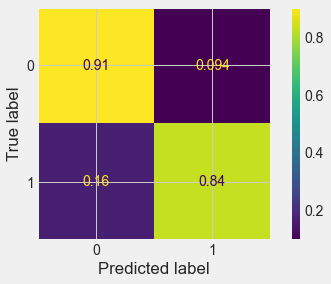

In [40]:
plot_confusion_matrix(pipe, x_train, y_train, normalize= "true")

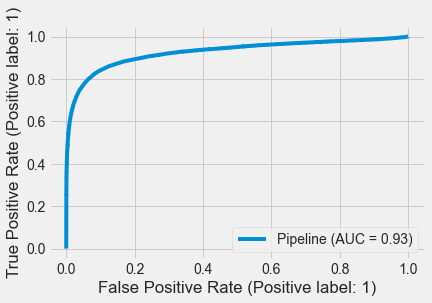

In [41]:
plot_roc_curve(pipe, x_train, y_train)

In [42]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    from sklearn.metrics import confusion_matrix
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [43]:
print_score(pipe, x_train, y_train, x_test, y_test, train = False)

Test Result:
Accuracy Score: 87.10%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.873124      0.868006  0.870969      0.870565      0.870877
recall         0.900950      0.832644  0.870969      0.866797      0.870969
f1-score       0.886819      0.849957  0.870969      0.868388      0.870639
support    14528.000000  11365.000000  0.870969  25893.000000  25893.000000
_______________________________________________
Confusion Matrix: 
 [[13089  1439]
 [ 1902  9463]]



In [44]:
# cari alternatif terbaik 

In [45]:
# GRID SEARCH

params = {}
params["columntransformer__onehotencoder__drop"] = ["if_binary", "first"]
params["logisticregression__C" ] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
params["logisticregression__penalty"] = ["l1", "l2"]
params["logisticregression__solver"] = ["saga", "libniear"]

In [46]:
gscv = GridSearchCV(pipe, params, cv= 5 ,scoring= "accuracy", n_jobs= -1)
gscv.fit(x_train, y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.4s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   3.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                                         ['Type '
                               

In [47]:
gscv.best_score_

0.8756009167130527

In [48]:
gscv.best_params_

{'columntransformer__onehotencoder__drop': 'if_binary',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

In [49]:
# GRID SEARCH PAKE stratifiedKfold

kfold = StratifiedKFold(n_splits=7, shuffle= True, random_state= 42)
gscv = GridSearchCV(pipe, params, cv=  kfold ,scoring= "accuracy", n_jobs= -1)
gscv.fit(x_train, y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.4s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.8s


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                        

In [50]:
gscv.best_score_

0.8755719654959468

In [51]:
gscv.best_params_

{'columntransformer__onehotencoder__drop': 'if_binary',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

### Testing model dengan test data

In [53]:
gscv.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

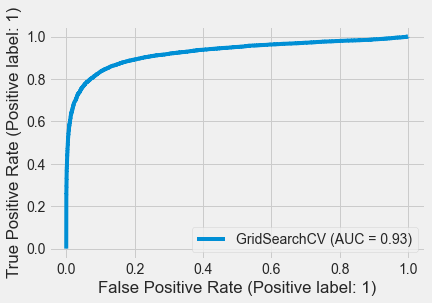

In [54]:
plot_roc_curve(gscv, x_test, y_test)

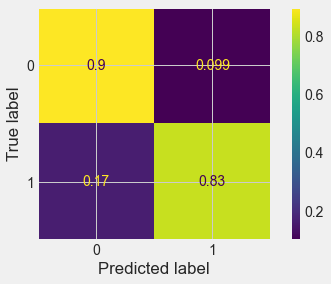

In [55]:
plot_confusion_matrix(gscv, x_test, y_test, normalize= "true")

In [57]:
cv_predict_test = cross_val_predict(gscv, x_test, y_test, n_jobs= -1)
cv_predict_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
# akurasi test set langsung
accuracy_score(y_test, gscv.predict(x_test))

0.871200710616769

In [59]:
# akurasi dengan prediksi dari cross val pred
accuracy_score(y_test, cv_predict_test)

0.8709303672807323

In [60]:
# roc with test set
roc_auc_score(y_test, gscv.predict(x_test))

0.867022640928463

In [61]:
# roc with cv predict
roc_auc_score(y_test, cv_predict_test)

0.866810462094769

In [63]:
cross_validate(gscv,x_test, y_test, scoring= "accuracy", n_jobs=-1)

{'fit_time': array([156.89988971, 166.32994032, 221.8074863 , 220.72984552,
        221.02827168]),
 'score_time': array([1.7100327 , 0.84200668, 0.02384663, 0.0201056 , 0.01887727]),
 'test_score': array([0.87024522, 0.87082448, 0.87487932, 0.87736578, 0.86133642])}

In [425]:
# cv akurasi
cross_val_score(gscv, x_test, y_test, scoring= "accuracy", n_jobs=-1).mean()

0.8709303273440421

In [426]:
# cv roc auc with ovo
cross_val_score(gscv, x_test, y_test, scoring= "roc_auc_ovo", n_jobs=-1).mean()

0.9253513537446478

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.2s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.3s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.2s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.6s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.2s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.8s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.2s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.1s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.1s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   1.7s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.3s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   2.1s
[Pipel

([0.8718022975190656,
  0.8728641760787721,
  0.8743162365660596,
  0.8748461519897676,
  0.8745873313126243,
  0.8743645022202201,
  0.8741915465765704,
  0.87489592760181,
  0.8749061501169101,
  0.8755815973898102],
 [0.8704283010852354,
  0.8709689877573089,
  0.871200710616769,
  0.8711234696636156,
  0.871316572046499,
  0.8710076082338856,
  0.871316572046499,
  0.871316572046499,
  0.871084849187039,
  0.8708145058510022])

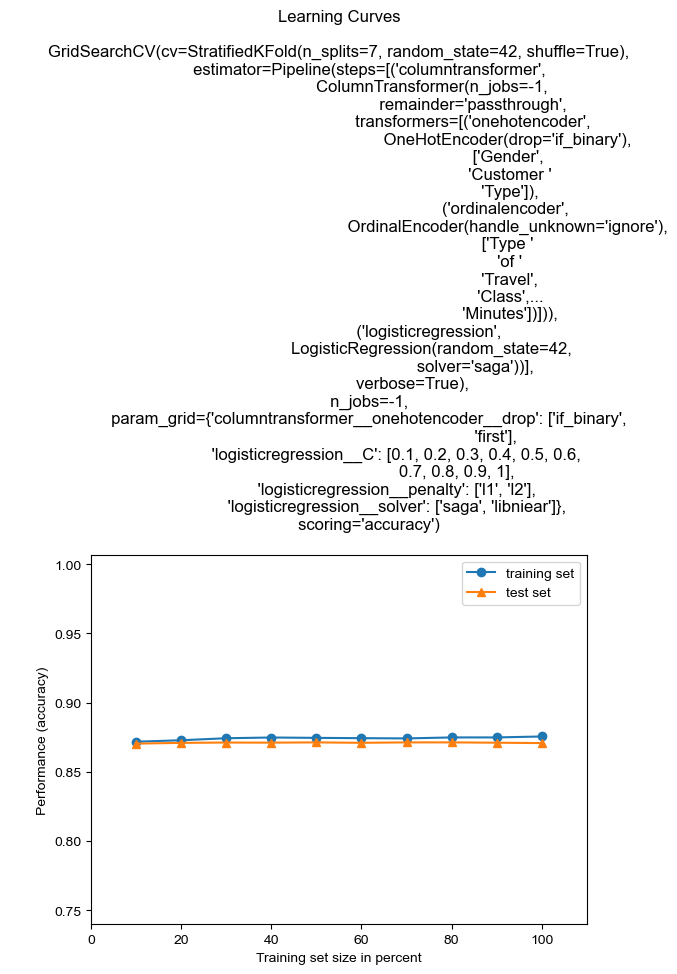

In [462]:
plot_learning_curves(x_train, y_train, x_test, y_test, gscv, scoring= "accuracy")

In [420]:
# summary menggunakan best model dari GS 
print_score(gscv, x_train, y_train, x_test, y_test, train = False)

Test Result:
Accuracy Score: 87.08%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.873040      0.867755  0.870815      0.870398      0.870720
recall         0.900743      0.832556  0.870815      0.866650      0.870815
f1-score       0.886675      0.849791  0.870815      0.868233      0.870486
support    14528.000000  11365.000000  0.870815  25893.000000  25893.000000
_______________________________________________
Confusion Matrix: 
 [[13086  1442]
 [ 1903  9462]]



### Test Penggunaan PCA ke model

In [459]:
# MODEL WITH PCA TEST

In [64]:
pca = PCA(n_components= 4, svd_solver= "randomized")
x_train_pca = pca.fit_transform(ct.fit_transform(x_train))

In [65]:
x_train_pca

array([[-1.00298219, -2.02365371, -1.41976782,  0.22028806],
       [-4.38904591, -1.12604474, -0.45527915,  0.28752501],
       [-1.05638905,  0.21921003,  4.54570381,  1.73216323],
       ...,
       [ 0.28337294, -2.56688334, -2.36608996, -0.76213139],
       [-0.17155933,  3.47223311, -0.81064932, -2.33632863],
       [-1.47498839, -1.60295387,  2.2859906 ,  0.4152246 ]])

In [66]:
logreg.fit(x_train_pca, y_train)

LogisticRegression(random_state=42, solver='saga')

In [67]:
pd.DataFrame(classification_report(y_train, logreg.predict(x_train_pca), output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.839363      0.806843  0.825637       0.823103       0.825269
recall         0.856108      0.785799  0.825637       0.820954       0.825637
f1-score       0.847653      0.796182  0.825637       0.821917       0.825346
support    58697.000000  44897.000000  0.825637  103594.000000  103594.000000

In [68]:
# BUAT PIPELINE BARU DENGAN TAMBAHAN pca namun menggunakan settingan column transofrmer sebelumnya

pipe_pca = make_pipeline(ct, pca, logreg, verbose= True)

In [439]:
# raw model pipeline with pca

pipe_pca.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.6s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.6s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.8s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'On-board ser

In [442]:
cross_val_score(pipe2, x_train, y_train, n_jobs=-1, scoring= "accuracy").mean()

0.825665581818144

In [444]:
print_score(pipe_pca, x_train, y_train, x_test, y_test, train= False)

Test Result:
Accuracy Score: 82.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.837216      0.810490  0.825822      0.823853      0.825485
recall         0.856002      0.787242  0.825822      0.821622      0.825822
f1-score       0.846505      0.798697  0.825822      0.822601      0.825521
support    14528.000000  11365.000000  0.825822  25893.000000  25893.000000
_______________________________________________
Confusion Matrix: 
 [[12436  2092]
 [ 2418  8947]]



In [79]:
# MENCOBA GRIDSEARCH DENGAN PCA

params_pca = {}
params_pca["columntransformer__onehotencoder__drop"] = ["if_binary", "first"]
params_pca["pca__n_components"] = [2,3,4,5,6,7,8,9,10,11]
params_pca["logisticregression__C" ] = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8,  1]
params_pca["logisticregression__penalty"] = ["l1", "l2"]
params_pca["logisticregression__solver"] = ["saga", "libniear"]

In [447]:
gscv_pca = GridSearchCV(pipe_pca, params_pca, n_jobs=-1, scoring= "accuracy", cv = kfold)

In [448]:
gscv_pca.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.6s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.8s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.6s


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                        

In [449]:
gscv_pca.best_score_

0.8325868634555033

In [450]:
gscv_pca.best_params_

{'columntransformer__onehotencoder__drop': 'if_binary',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga',
 'pca__n_components': 10}

In [458]:
pd.DataFrame(gscv_pca.cv_results_)[["params", "mean_test_score", "rank_test_score"]].sort_values("rank_test_score", 
                                                                                                ascending = True)

params  mean_test_score  \
8    {'columntransformer__onehotencoder__drop': 'if...         0.832587   
288  {'columntransformer__onehotencoder__drop': 'fi...         0.832568   
48   {'columntransformer__onehotencoder__drop': 'if...         0.832558   
28   {'columntransformer__onehotencoder__drop': 'if...         0.832558   
308  {'columntransformer__onehotencoder__drop': 'fi...         0.832558   
..                                                 ...              ...   
238  {'columntransformer__onehotencoder__drop': 'if...              NaN   
237  {'columntransformer__onehotencoder__drop': 'if...              NaN   
236  {'columntransformer__onehotencoder__drop': 'if...              NaN   
255  {'columntransformer__onehotencoder__drop': 'if...              NaN   
559  {'columntransformer__onehotencoder__drop': 'fi...              NaN   

     rank_test_score  
8                  1  
288                2  
48                 3  
28                 3  
308                3  
..               ...  
238              556  
237              557  
236              558  
255              559  
559              560  

[560 rows x 3 columns]

In [81]:
# Daripada ngulang, terlalu lama untuk grid search

random_scv = RandomizedSearchCV(pipe_pca, params_pca, n_jobs=-1, scoring= "accuracy", cv= kfold)
random_scv.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.4s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.6s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.5s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='

In [82]:
random_scv.best_score_

0.8324323632949214

In [83]:
# hasilnya sama dengan waktu yangajuh lebih sebenta
random_scv.best_params_

{'pca__n_components': 11,
 'logisticregression__solver': 'saga',
 'logisticregression__penalty': 'l2',
 'logisticregression__C': 0.1,
 'columntransformer__onehotencoder__drop': 'first'}

In [70]:
# berdasarkan parameter terbaik, lakukan refitting kembali terhadap model tersebut

params_pca = {}
params_pca["columntransformer__onehotencoder__drop"] = ["if_binary"]
params_pca["pca__n_components"] = [11]
params_pca["logisticregression__C" ] = [0.1]
params_pca["logisticregression__penalty"] = ["l1"]
params_pca["logisticregression__solver"] = ["saga"]

In [72]:
gscv_pca = GridSearchCV(pipe_pca, params_pca, n_jobs=-1, scoring= "accuracy", cv = kfold)
gscv_pca.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.6s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.7s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.7s


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                        

In [73]:
cross_val_score(gscv_pca, x_train, y_train, n_jobs= -1, scoring= "accuracy", cv= kfold).mean()

0.8324420184135367

In [75]:
cross_val_score(gscv_pca, x_train, y_train, n_jobs = -1, scoring = "roc_auc_ovo", cv= kfold).mean()

0.8926401922405133

In [76]:
print_score(gscv_pca, x_train, y_train, x_test, y_test)

Train Result:
Accuracy Score: 83.25%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.838611      0.823639  0.832461       0.831125       0.832122
recall         0.872157      0.780564  0.832461       0.826361       0.832461
f1-score       0.855055      0.801523  0.832461       0.828289       0.831855
support    58697.000000  44897.000000  0.832461  103594.000000  103594.000000
_______________________________________________
Confusion Matrix: 
 [[51193  7504]
 [ 9852 35045]]



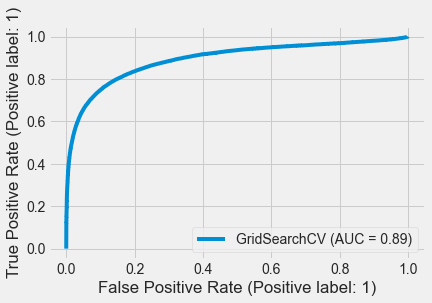

In [77]:
plot_roc_curve(gscv_pca, x_train, y_train)

### Test lagi penggunaan PCA jika dimasukan ke dalam Pipeline
mencoba masukan pca ke ColumnTransformer dan kolom yang di reduksi adalah kolom yang punya stats penilaian sama yaitu yang punya penilaian range 1- 5

In [84]:
data

Gender      Customer Type  Age   Type of Travel     Class  \
45318  Female     Loyal Customer   30  Business travel  Business   
53230  Female     Loyal Customer   63  Business travel       Eco   
88562    Male     Loyal Customer   66  Personal Travel       Eco   
25019  Female     Loyal Customer   22  Personal Travel       Eco   
7038     Male     Loyal Customer   59  Business travel  Business   
...       ...                ...  ...              ...       ...   
17055    Male     Loyal Customer   44  Personal Travel       Eco   
44021    Male  disloyal Customer   23  Business travel       Eco   
92969    Male  disloyal Customer   21  Business travel       Eco   
42284  Female     Loyal Customer   53  Business travel  Business   
41062    Male     Loyal Customer   58  Business travel       Eco   

       Flight Distance  Inflight wifi service  \
45318             2329                      4   
53230             1069                      5   
88562              647                      3   
25019              427                      2   
7038              2082                      2   
...                ...                    ...   
17055              364                      1   
44021             1199                      2   
92969              966                      4   
42284             2694                      1   
41062              758                      4   

       Departure/Arrival time convenient  Ease of Online booking  \
45318                                  4                       4   
53230                                  4                       4   
88562                                  5                       3   
25019                                  3                       0   
7038                                   2                       2   
...                                  ...                     ...   
17055                                  5                       1   
44021                                  2                       2   
92969                                  4                       4   
42284                                  1                       1   
41062                                  4                       4   

       Gate location  Food and drink  Online boarding  Seat comfort  \
45318              4               3                3             3   
53230              4               4                4             5   
88562              2               5                3             5   
25019              3               2                0             2   
7038               2               2                5             5   
...              ...             ...              ...           ...   
17055              2               3                1             3   
44021              2               1                2             1   
92969              3               2                4             2   
42284              1               3                5             4   
41062              4               4                4             4   

       Inflight entertainment  On-board service  Leg room service  \
45318                       3                 5                 3   
53230                       5                 5                 5   
88562                       5                 3                 1   
25019                       2                 4                 2   
7038                        5                 5                 5   
...                       ...               ...               ...   
17055                       3                 5                 5   
44021                       1                 1                 2   
92969                       2                 5                 3   
42284                       4                 4                 4   
41062                       4                 2                 1   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
45318                 4    

In [95]:
pca = PCA(n_components=1, random_state= 42)

In [106]:
ct_pca = make_column_transformer(
                (ohe, ['Gender', 'Customer Type']),
                (oe, ['Type of Travel', 'Class']),
                (pca, ['Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking',
                       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service',
                       'Cleanliness']),
                (scaler, ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ),
                remainder= "passthrough", n_jobs= -1)

pipe_pca_ct = make_pipeline(ct_pca, logreg)

In [108]:
pipe_pca_ct.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class']),
                                                 ('pca',
                                                  PCA(n_components=1,
                                                      random_state=42),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival tim...
                                                   'Food and drink',
 

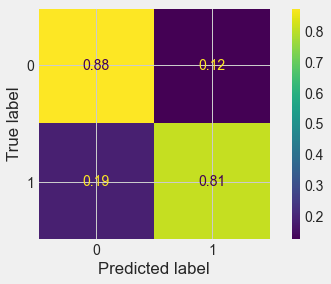

In [112]:
plot_confusion_matrix(pipe_pca_ct, x_train, y_train, normalize= "true")

In [134]:
params_pca_ct = {}
params_pca_ct["columntransformer__onehotencoder__drop"] = ["if_binary"]
params_pca_ct["columntransformer__pca__n_components"] = [1,2,3,4,5,6,7,8,9,10]
params_pca_ct["columntransformer__pca__svd_solver"] = ['auto', 'full', 'arpack', 'randomized']
params_pca_ct["logisticregression__C" ] = [0.1]
params_pca_ct["logisticregression__penalty"] = ["l1"]
params_pca_ct["logisticregression__solver"] = ["saga"]

In [135]:
gscv_pca_ct = GridSearchCV(pipe_pca_ct, params_pca_ct, n_jobs=-1, cv= kfold, scoring= "accuracy")

In [136]:
gscv_pca_ct.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                        

In [137]:
gscv_pca_ct.best_score_

0.8726953382533152

In [138]:
gscv_pca_ct.best_params_

{'columntransformer__onehotencoder__drop': 'if_binary',
 'columntransformer__pca__n_components': 9,
 'columntransformer__pca__svd_solver': 'auto',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

([0.8708369533738778,
  0.8716574958972874,
  0.8712594118025613,
  0.8713709969351063,
  0.8725987991582524,
  0.8723051676427055,
  0.8731434875542992,
  0.8727722473604826,
  0.8728146384366219,
  0.8726953298453578],
 [0.8665276329509907,
  0.8686131386861314,
  0.8687290001158614,
  0.8686131386861314,
  0.8680724520140578,
  0.8681883134437879,
  0.8687676205924381,
  0.8682269339203645,
  0.8683814158266713,
  0.8684586567798247])

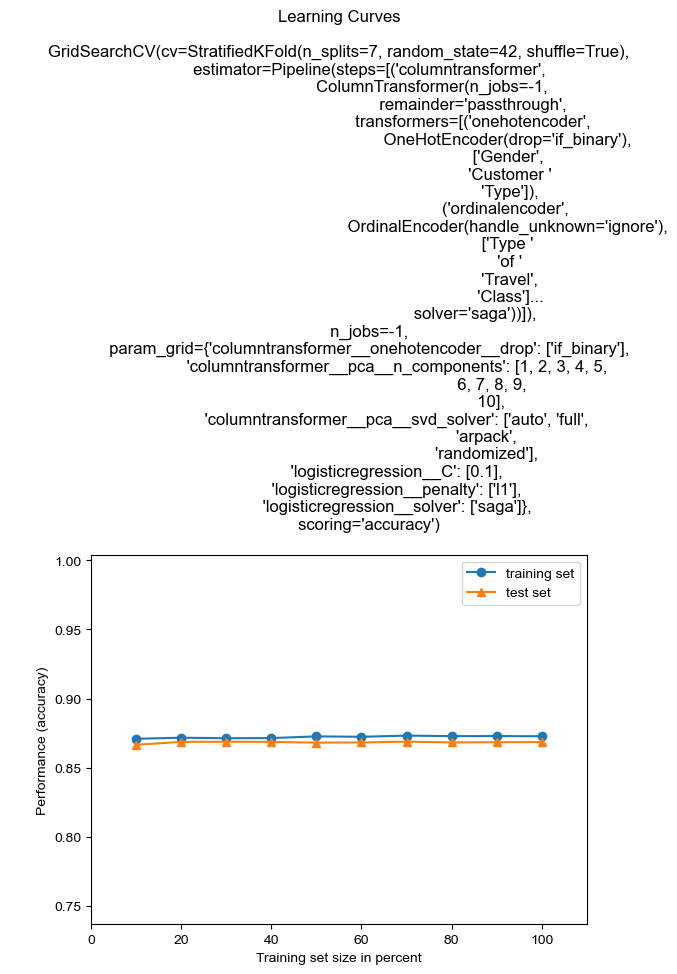

In [140]:
plot_learning_curves(x_train, y_train, x_test, y_test, gscv_pca_ct, scoring= "accuracy")

In [271]:
pd.DataFrame(gscv_pca_ct.cv_results_)[["params", "mean_test_score", "rank_test_score"]].sort_values("rank_test_score")

params  mean_test_score  \
35  {'columntransformer__onehotencoder__drop': 'if...         0.872695   
34  {'columntransformer__onehotencoder__drop': 'if...         0.872695   
33  {'columntransformer__onehotencoder__drop': 'if...         0.872695   
32  {'columntransformer__onehotencoder__drop': 'if...         0.872695   
39  {'columntransformer__onehotencoder__drop': 'if...         0.872637   
37  {'columntransformer__onehotencoder__drop': 'if...         0.872637   
36  {'columntransformer__onehotencoder__drop': 'if...         0.872637   
38  {'columntransformer__onehotencoder__drop': 'if...         0.872637   
31  {'columntransformer__onehotencoder__drop': 'if...         0.872483   
30  {'columntransformer__onehotencoder__drop': 'if...         0.872483   
29  {'columntransformer__onehotencoder__drop': 'if...         0.872483   
28  {'columntransformer__onehotencoder__drop': 'if...         0.872483   
18  {'columntransformer__onehotencoder__drop': 'if...         0.872464   
17  {'columntransformer__onehotencoder__drop': 'if...         0.872464   
16  {'columntransformer__onehotencoder__drop': 'if...         0.872464   
19  {'columntransformer__onehotencoder__drop': 'if...         0.872464   
27  {'columntransformer__onehotencoder__drop': 'if...         0.872425   
26  {'columntransformer__onehotencoder__drop': 'if...         0.872425   
25  {'columntransformer__onehotencoder__drop': 'if...         0.872425   
24  {'columntransformer__onehotencoder__drop': 'if...         0.872425   
20  {'columntransformer__onehotencoder__drop': 'if...         0.872377   
21  {'columntransformer__onehotencoder__drop': 'if...         0.872377   
22  {'columntransformer__onehotencoder__drop': 'if...         0.872377   
23  {'columntransformer__onehotencoder__drop': 'if...         0.872377   
15  {'columntransformer__onehotencoder__drop': 'if...         0.869973   
14  {'columntransformer__onehotencoder__drop': 'if...         0.869973   
12  {'columntransformer__onehotencoder__drop': 'if...         0.869973   
13  {'columntransformer__onehotencoder__drop': 'if...         0.869973   
10  {'columntransformer__onehotencoder__drop': 'if...         0.854528   
9   {'columntransformer__onehotencoder__drop': 'if...         0.854528   
8   {'columntransformer__onehotencoder__drop': 'if...         0.854528   
11  {'columntransformer__onehotencoder__drop': 'if...         0.854528   
7   {'columntransformer__onehotencoder__drop': 'if...         0.853186   
6   {'columntransformer__onehotencoder__drop': 'if...         0.853186   
5   {'columntransformer__onehotencoder__drop': 'if...         0.853186   
4   {'columntransformer__onehotencoder__drop': 'if...         0.853186   
3   {'columntransformer__onehotencoder__drop': 'if...         0.851217   
2   {'columntransformer__onehotencoder__drop': 'if...         0.851217   
1   {'columntransformer__onehotencoder__drop': 'if...         0.851217   
0   {'columntransformer__onehotencoder__drop': 'if...         0.851217   

    rank_test_score  
35                1  
34                1  
33                1  
32                1  
39                5  
37                5  
36                5  
38                5  
31                9  
30                9  
29                9  
28                9  
18               13  
17               13  
16               13  
19               13  
27               17  
26               17  
25               17  
24               17  
20               21  
21               21  
22               21  
23               21  
15               25  
14               25  
12               25  
13               25  
10               29  
9                29  
8                29  
11               29  
7                33  
6                33  
5                33  
4                33  
3                37  
2                37  
1                37  
0                37

### Test pemakaian RFE

In [285]:
# RFE
data

Gender      Customer Type  Age   Type of Travel     Class  \
45318  Female     Loyal Customer   30  Business travel  Business   
53230  Female     Loyal Customer   63  Business travel       Eco   
88562    Male     Loyal Customer   66  Personal Travel       Eco   
25019  Female     Loyal Customer   22  Personal Travel       Eco   
7038     Male     Loyal Customer   59  Business travel  Business   
...       ...                ...  ...              ...       ...   
17055    Male     Loyal Customer   44  Personal Travel       Eco   
44021    Male  disloyal Customer   23  Business travel       Eco   
92969    Male  disloyal Customer   21  Business travel       Eco   
42284  Female     Loyal Customer   53  Business travel  Business   
41062    Male     Loyal Customer   58  Business travel       Eco   

       Flight Distance  Inflight wifi service  \
45318             2329                      4   
53230             1069                      5   
88562              647                      3   
25019              427                      2   
7038              2082                      2   
...                ...                    ...   
17055              364                      1   
44021             1199                      2   
92969              966                      4   
42284             2694                      1   
41062              758                      4   

       Departure/Arrival time convenient  Ease of Online booking  \
45318                                  4                       4   
53230                                  4                       4   
88562                                  5                       3   
25019                                  3                       0   
7038                                   2                       2   
...                                  ...                     ...   
17055                                  5                       1   
44021                                  2                       2   
92969                                  4                       4   
42284                                  1                       1   
41062                                  4                       4   

       Gate location  Food and drink  Online boarding  Seat comfort  \
45318              4               3                3             3   
53230              4               4                4             5   
88562              2               5                3             5   
25019              3               2                0             2   
7038               2               2                5             5   
...              ...             ...              ...           ...   
17055              2               3                1             3   
44021              2               1                2             1   
92969              3               2                4             2   
42284              1               3                5             4   
41062              4               4                4             4   

       Inflight entertainment  On-board service  Leg room service  \
45318                       3                 5                 3   
53230                       5                 5                 5   
88562                       5                 3                 1   
25019                       2                 4                 2   
7038                        5                 5                 5   
...                       ...               ...               ...   
17055                       3                 5                 5   
44021                       1                 1                 2   
92969                       2                 5                 3   
42284                       4                 4                 4   
41062                       4                 2                 1   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
45318                 4    

In [284]:
from sklearn.feature_selection import RFE

In [304]:
rfe = RFE(logreg, 15)

In [305]:
rfe_hasil = rfe.fit(ct.fit_transform(x_train), y_train)

In [307]:
rfe_hasil.support_

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True])

In [308]:
rfe_hasil.ranking_

array([5, 1, 1, 1, 1, 1, 1, 6, 7, 1, 3, 4, 1, 1, 1, 1, 1, 1, 2, 8, 1, 1])

In [298]:
(ct.fit_transform(x_train)).shape

(103594, 22)

In [309]:
rfe

RFE(estimator=LogisticRegression(random_state=42, solver='saga'),
    n_features_to_select=15)

In [312]:
ct = make_column_transformer(
                (ohe, ['Gender', 'Customer Type']),
                (oe, ['Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking',
                       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service',
                       'Cleanliness']),
                (scaler, ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ),
                remainder= "passthrough", n_jobs= -1)

logreg = LogisticRegression(penalty= "l2", solver= "saga", random_state= 42)

pipe_simple_rfe = make_pipeline(ct,rfe, logreg, verbose= True)

In [314]:
pipe_simple_rfe.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   2.4s
[Pipeline] ............... (step 2 of 3) Processing rfe, total=  19.7s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   1.9s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'Checkin serv

In [316]:
cross_val_score(pipe_simple_rfe, x_train,y_train, n_jobs=-1, scoring = "accuracy").mean()

0.8746935328199607

In [319]:
pd.DataFrame(classification_report(y_train ,pipe_simple_rfe.predict(x_train), output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.878781      0.870407  0.875292       0.874594       0.875152
recall         0.904697      0.836849  0.875292       0.870773       0.875292
f1-score       0.891551      0.853298  0.875292       0.872425       0.874972
support    58697.000000  44897.000000  0.875292  103594.000000  103594.000000

In [ ]:
# mencoba grid search rfe, dengan settingan lainnya sudah yang paling baik berdasarkan percobaan sebelumnya

In [333]:
params_rfe_ct = {}
params_rfe_ct["columntransformer__onehotencoder__drop"] = ["if_binary"]
params_rfe_ct["rfe__n_features_to_select"] = [19,20,21,1,2,3]
params_rfe_ct["logisticregression__C" ] = [0.1]
params_rfe_ct["logisticregression__penalty"] = ["l1"]
params_rfe_ct["logisticregression__solver"] = ["saga"]

In [334]:
gscv_rfe_ct = GridSearchCV(pipe_simple_rfe, params_rfe_ct, n_jobs=-1, cv= kfold, scoring= "accuracy")

In [335]:
gscv_rfe_ct.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.4s
[Pipeline] ............... (step 2 of 3) Processing rfe, total=   5.7s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   3.0s


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='ignore'),
                                                        

In [336]:
gscv_rfe_ct.best_score_

0.8754850883433896

In [337]:
gscv_rfe_ct.best_params_

{'columntransformer__onehotencoder__drop': 'if_binary',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga',
 'rfe__n_features_to_select': 21}

### Tambahan Penggunaan RFECV
setelah mencari cari, ternyata ada yang simpel penggunaannya yaitu dapat menggunakan RFCV dimana simpelnya adalah cross validasi dengan tambahan fitu RFE di dalamnya, akan di coba

In [338]:
from sklearn.feature_selection import RFECV

In [342]:
# akan dicoba dengan pipe line di bawah

pipe.named_steps

{'columntransformer': ColumnTransformer(n_jobs=-1, remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='if_binary'),
                                  ['Gender', 'Customer Type']),
                                 ('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='ignore'),
                                  ['Type of Travel', 'Class',
                                   'Inflight wifi service',
                                   'Departure/Arrival time convenient',
                                   'Ease of Online booking', 'Gate location',
                                   'Food and drink', 'Online boarding',
                                   'Seat comfort', 'Inflight entertainment',
                                   'On-board service', 'Leg room service',
                                   'Baggage handling', 'Checkin service',
                                   'Inflight 

In [348]:
# ternyata setelah di coba ketika menggunakan pipeline seperti di bawah tidak jadi saat lakukan fiting
# rfecv = RFECV(pipe, n_jobs= -1,min_features_to_select=1, cv= kfold, importance_getter= "auto", scoring = "accuracy")

# fitting dengan
# rfecv.fit(x_train, y_train)

# karena memang secara model tersebut data yang dimasukan pada fitting benar benar mentah masih ada yang "text based"
# sehingga tidak bisa, karena cara kerjanya seperti cek dulu data input baru masuk ke Estimatornya, bukan langsung masuk ke
# Estimator untuk dihitung baru di CV

# sehingga untuk bisa seperti di bawah ini

rfecv = RFECV(logreg_rfe, n_jobs= -1,min_features_to_select=1, cv= kfold, importance_getter= "auto", scoring = "accuracy")

In [349]:
rfecv.fit(ct.fit_transform(x_train), y_train)

RFECV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
      estimator=LogisticRegression(random_state=42, solver='saga'), n_jobs=-1,
      scoring='accuracy')

In [350]:
rfecv.get_params

<bound method BaseEstimator.get_params of RFECV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
      estimator=LogisticRegression(random_state=42, solver='saga'), n_jobs=-1,
      scoring='accuracy')>

In [351]:
rfecv.support_

# untuk mengatasi hal tersebut mungkin salah satu caranya adalah RFECV langsung dimasukan ke pipelinenya dan akan di coba
# di bawah ini

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [352]:
# BUAT PIPELINE dengan RFECV di dalamnya

# COBA RFECV langsung di masukan ke pipeline agar langsung mengetahui feature yang optimal untuk digunakan

ct = make_column_transformer(
                (ohe, ['Gender', 'Customer Type']),
                (oe, ['Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking',
                       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service',
                       'Cleanliness']),
                (scaler, ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ),
                remainder= "passthrough", n_jobs= -1)

logreg_rfecv = LogisticRegression(penalty= "l1",C=0.1,  solver= "saga", random_state= 42)


rfecv = RFECV(logreg_rfecv, n_jobs= -1,min_features_to_select=1 , importance_getter= "auto", scoring = "accuracy")

# bentuk pipelinenya 
pipe_simple_rfecv = make_pipeline(ct, rfecv , logreg, verbose= True)

In [353]:
pipe_simple_rfecv.fit(x_train, y_train)

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   2.9s
[Pipeline] ............. (step 2 of 3) Processing rfecv, total=  49.9s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   2.5s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'Inflight ser

In [366]:
accuracy_score(y_train, pipe_simple_rfecv.predict(x_train))

0.8755333320462575

In [358]:
pd.DataFrame(classification_report(y_train, pipe_simple_rfecv.predict(x_train), output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.878531      0.871325  0.875533       0.874928       0.875408
recall         0.905532      0.836314  0.875533       0.870923       0.875533
f1-score       0.891827      0.853461  0.875533       0.872644       0.875199
support    58697.000000  44897.000000  0.875533  103594.000000  103594.000000

Text(0, 0.5, 'Presentase Keberhasilan')

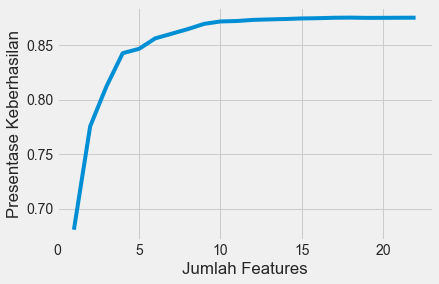

In [363]:
rfecvscore = pipe_simple_rfecv.named_steps.rfecv.grid_scores_

plt.plot(range(1, len(rfecvscore) + 1), rfecvscore)
plt.xlabel("Jumlah Features")
plt.ylabel("Presentase Keberhasilan")

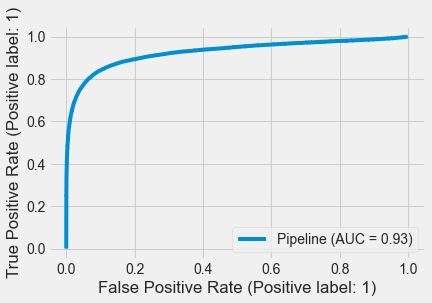

In [364]:
plot_roc_curve(pipe_simple_rfecv, x_train, y_train)

###  Testing penggunaan RFE dan PCA dalam satu pipeline

In [371]:
# parameter yang sudah disetting sudah berdasarkan GSCV sebelumnya di atas

ct = make_column_transformer(
                (ohe, ['Gender', 'Customer Type']),
                (oe, ['Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking',
                       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Inflight service',
                       'Cleanliness']),
                (scaler, ["Age", "Flight Distance", 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] ),
                remainder= "passthrough", n_jobs= -1)

logreg_rfecv = LogisticRegression(penalty= "l1",C=0.1,  solver= "saga", random_state= 42)

pca_in_rfe = PCA(n_components=9, svd_solver="auto" , random_state= 42)

rfecv = RFECV(logreg_rfecv, n_jobs= -1,min_features_to_select=1 , importance_getter= "auto", scoring = "accuracy")

# bentuk pipelinenya 
pipe_pca_with_rfecv = make_pipeline(ct, pca_in_rfe,  rfecv , logreg, verbose= True)

In [372]:
pipe_pca_with_rfecv.fit(x_train, y_train)

[Pipeline] . (step 1 of 4) Processing columntransformer, total=   2.3s
[Pipeline] ............... (step 2 of 4) Processing pca, total=   0.6s
[Pipeline] ............. (step 3 of 4) Processing rfecv, total=   7.4s
[Pipeline]  (step 4 of 4) Processing logisticregression, total=   0.5s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                  StandardScaler

In [374]:
accuracy_score(pipe_pca_with_rfecv.predict(x_train), y_train)

0.8322296658107612

In [376]:
pd.DataFrame(classification_report(pipe_pca_with_rfecv.predict(x_train), y_train, output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.870130      0.782680   0.83223       0.826405       0.834031
recall         0.839605      0.821738   0.83223       0.830672       0.832230
f1-score       0.854595      0.801734   0.83223       0.828164       0.832774
support    60831.000000  42763.000000   0.83223  103594.000000  103594.000000

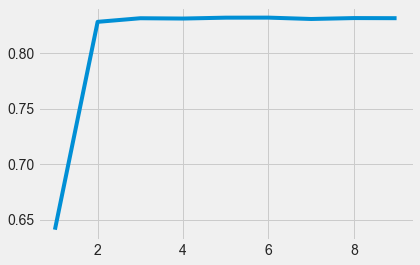

In [378]:
rfecvscore_pca = pipe_pca_with_rfecv.named_steps.rfecv.grid_scores_

plt.plot(range(1, len(rfecvscore_pca) + 1), rfecvscore_pca)

### Mencoba RandomForest

In [396]:
rf = RandomForestClassifier(n_estimators= 100, random_state= 42, n_jobs=-1, bootstrap= True, oob_score= True)

In [397]:
pipe_rf = make_pipeline(ct, rf)

In [398]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'Seat comfort

In [399]:
pd.DataFrame(classification_report(y_train, pipe_rf.predict(x_train), output_dict= True))

0             1  accuracy      macro avg  weighted avg
precision      1.000000      0.999978   0.99999       0.999989       0.99999
recall         0.999983      1.000000   0.99999       0.999991       0.99999
f1-score       0.999991      0.999989   0.99999       0.999990       0.99999
support    58697.000000  44897.000000   0.99999  103594.000000  103594.00000

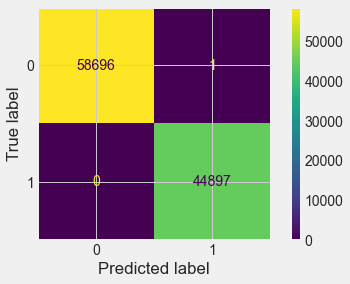

In [401]:
plot_confusion_matrix(pipe_rf, x_train, y_train)

In [402]:
cross_val_score(pipe_rf, x_train, y_train, n_jobs=-1, scoring= "accuracy").mean()

0.9620055300209239

In [406]:
cross_val_score(pipe_rf, x_train, y_train, n_jobs=-1, scoring= "roc_auc_ovo").mean()

0.9937964841603686

In [403]:
pd.DataFrame(classification_report(y_test, pipe_rf.predict(x_test), output_dict= True))

0             1  accuracy     macro avg  weighted avg
precision      0.955708      0.973890  0.963426      0.964799      0.963688
recall         0.980245      0.941927  0.963426      0.961086      0.963426
f1-score       0.967821      0.957642  0.963426      0.962731      0.963353
support    14528.000000  11365.000000  0.963426  25893.000000  25893.000000

In [404]:
cross_val_score(pipe_rf, x_test, y_test, n_jobs=-1, scoring= "accuracy").mean()

0.955084267503036

In [407]:
cross_val_score(pipe_rf, x_test, y_test, n_jobs=-1, scoring= "roc_auc_ovo").mean()

0.9916944668903314

In [405]:
pd.DataFrame(cross_validate(pipe_rf, x_test, y_test, n_jobs= -1, scoring= "accuracy", cv= kfold))

fit_time  score_time  test_score
0  3.585598    0.105145    0.955934
1  4.000081    0.260497    0.952420
2  3.587550    0.087040    0.960260
3  3.473910    0.185056    0.957556
4  4.234320    0.157967    0.960260
5  4.140696    0.179772    0.954312
6  1.219559    0.074670    0.955123

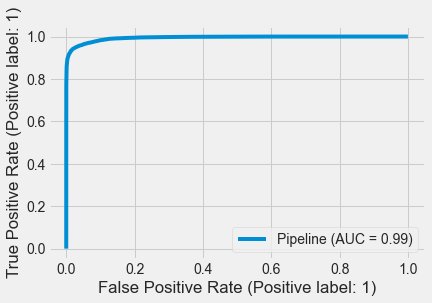

In [408]:
plot_roc_curve(pipe_rf, x_test, y_test)

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999903469312894],
 [0.9502954466458116,
  0.9563202409917738,
  0.9582512648206079,
  0.9596802224539451,
  0.960529872938632,
  0.9619202100953925,
  0.9621905534314293,
  0.9624608967674662,
  0.9633491677287298,
  0.9634264086818831])

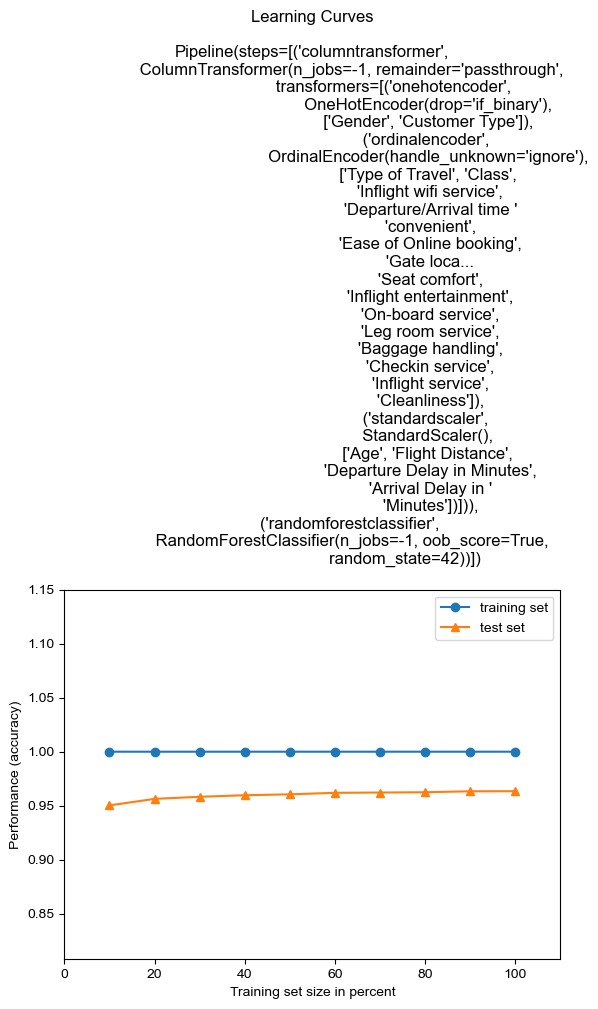

In [410]:
plot_learning_curves(x_train, y_train, x_test, y_test, pipe_rf, scoring= "accuracy")

In [412]:
# MENCOBA GRID SEARCH APAKAH BISA MENGHASILKAN MODEL YANG LEBIH BAIK

params_rf = {}
params_rf["randomforestclassifier__n_estimators"] = [100, 150, 200, 250]
params_rf["randomforestclassifier__bootstrap"] = [True, False]
params_rf["randomforestclassifier__min_samples_split"] = [2,3,4,5]
params_rf["randomforestclassifier__max_features"] = ["auto", "log2"]
params_rf["randomforestclassifier__class_weight"] = ["balanced", "balanced_subsample", None]

In [416]:
gscv_rf = RandomizedSearchCV(pipe_rf, params_rf, n_jobs= -1, n_iter=100, random_state= 42, scoring= "accuracy")

In [418]:
gscv_rf.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='ignore'),
                                                                        

In [419]:
gscv_rf.best_score_

0.9625267976883606

In [420]:
gscv_rf.best_params_

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__bootstrap': True}

In [427]:
pd.DataFrame(gscv_rf.cv_results_)[["mean_fit_time","mean_score_time",
                                   "params" ,"rank_test_score"]].sort_values("rank_test_score")

mean_fit_time  mean_score_time  \
20      29.645971         1.013967   
0       44.320071         2.066129   
58      43.164114         2.420359   
74      24.959041         1.917235   
2       37.669106         2.749331   
..            ...              ...   
69       0.816297         0.000000   
22       2.922796         0.000000   
19       0.378901         0.000000   
18       0.374192         0.000000   
72       1.120892         0.000000   

                                               params  rank_test_score  
20  {'randomforestclassifier__n_estimators': 200, ...                1  
0   {'randomforestclassifier__n_estimators': 250, ...                2  
58  {'randomforestclassifier__n_estimators': 250, ...                2  
74  {'randomforestclassifier__n_estimators': 150, ...                4  
2   {'randomforestclassifier__n_estimators': 250, ...                5  
..                                                ...              ...  
69  {'randomforestclassifier__n_estimators': 100, ...               96  
22  {'randomforestclassifier__n_estimators': 200, ...               97  
19  {'randomforestclassifier__n_estimators': 100, ...               98  
18  {'randomforestclassifier__n_estimators': 150, ...               99  
72  {'randomforestclassifier__n_estimators': 150, ...              100  

[100 rows x 4 columns]

In [429]:
cross_val_score(gscv_rf, x_test, y_test, n_jobs = -1, scoring = "accuracy").mean()

0.9545437120868205

In [430]:
cross_val_score(gscv_rf, x_test, y_test, n_jobs = -1, scoring = "roc_auc_ovo").mean()

0.991881744312207

In [442]:
pd.DataFrame(cross_validate(gscv_rf, x_test, y_test, n_jobs= -1, scoring= "accuracy", cv= kfold))

fit_time  score_time  test_score
0  1297.867378    1.704409    0.954853
1  1249.317287    1.765141    0.951609
2  1300.747691    0.209645    0.958637
3  1258.119003    1.088401    0.955934
4  1300.361539    0.211161    0.959178
5  1251.443547    0.603899    0.955664
6   377.411252    0.067012    0.952149

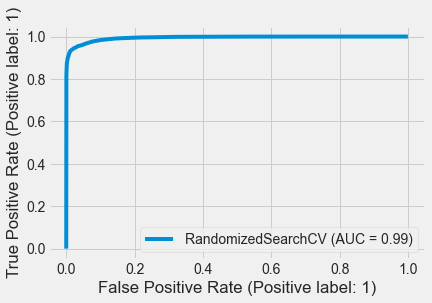

In [443]:
plot_roc_curve(gscv_rf, x_test, y_test)

### RF dengan RFE dan PCA dalam satu pipeline

tanpa menggunakan RFE dan PCA di atas sudah mengungguli lumayan jauh dari hasil regresi logistik, dengan menggunakan 2 hal di atas untuk data preproses apakah akan lebih baik atau tidak?

In [433]:
# parameter di bawah menggunakan best params berdasarkan GridSearchCV di atas
rf_rfecv = RandomForestClassifier(n_estimators= 200, min_samples_split=2, max_features= "log2", class_weight= "balanced",
                                  bootstrap= True, oob_score= True)

# PCA juga sudah berdasarkan best params sebelumnya
pca_in_rfe = PCA(n_components=9, svd_solver="auto" , random_state= 42)

# untuk RFE karena CV maka akan menyesuikan sesuai dengan hasil dari CV
rfecv = RFECV(logreg_rfecv, n_jobs= -1,min_features_to_select=1 , importance_getter= "auto", scoring = "accuracy")

# bentuk pipelinenya 
pipe_rf_pca_with_rfecv = make_pipeline(ct, pca_in_rfe,  rfecv , rf_rfecv)

In [434]:
pipe_rf_pca_with_rfecv.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate loca...
                                                   'Departure De

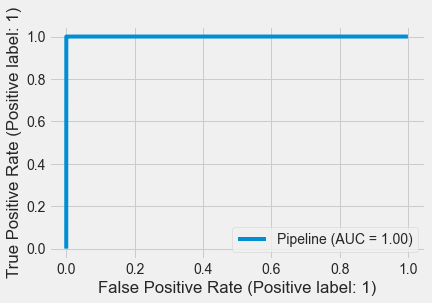

In [438]:
plot_roc_curve(pipe_rf_pca_with_rfecv, x_train, y_train)

([1.0,
  0.9999517327927406,
  0.9999678228972263,
  0.9998793348939353,
  0.9999034693128945,
  0.9999356457944527,
  0.999972419499414,
  0.9998914027149322,
  0.9998927429907545,
  0.9999034693128945],
 [0.8542463213996061,
  0.858610435252771,
  0.8700420963194686,
  0.8586876762059243,
  0.8730544934924497,
  0.8735565596879465,
  0.8767234387672344,
  0.8760282701888541,
  0.8765689568609276,
  0.8758737882825474])

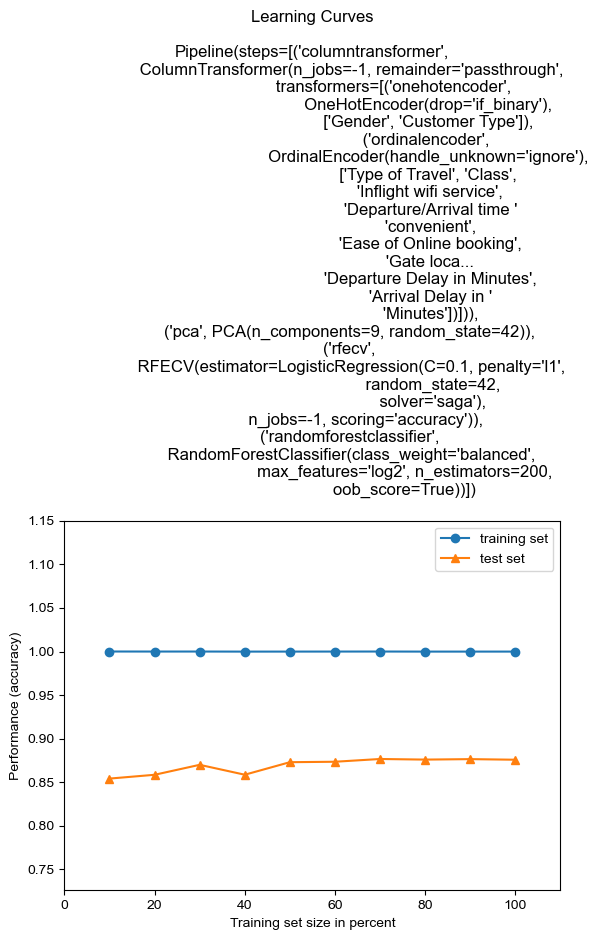

In [441]:
plot_learning_curves(x_train, y_train, x_test, y_test, pipe_rf_pca_with_rfecv, scoring = "accuracy")

In [435]:
# langsung coba test data
testing_rf_with_pca_rfecv = pd.DataFrame(classification_report(y_test, pipe_rf_pca_with_rfecv.predict(x_test), output_dict= True))
testing_rf_with_pca_rfecv

0             1  accuracy     macro avg  weighted avg
precision      0.871226      0.884529  0.876685      0.877877      0.877064
recall         0.915542      0.827013  0.876685      0.871278      0.876685
f1-score       0.892834      0.854804  0.876685      0.873819      0.876142
support    14528.000000  11365.000000  0.876685  25893.000000  25893.000000

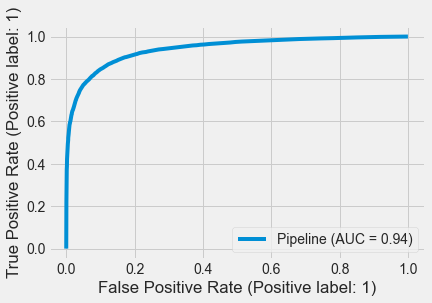

In [440]:
# coba dengan test

plot_roc_curve(pipe_rf_pca_with_rfecv, x_test, y_test)

### Support Vector Machines

In [464]:
from sklearn.svm import SVC

In [465]:
# test pake default setting
svc = SVC()

In [466]:
# buat pipeline

pipe_svc = make_pipeline(ct, svc)

In [468]:
pipe_svc.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'Customer Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='ignore'),
                                                  ['Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and 

In [470]:
pd.DataFrame(classification_report(y_train, pipe_svc.predict(x_train), output_dict= True))

0             1  accuracy      macro avg   weighted avg
precision      0.943239      0.950803  0.946425       0.947021       0.946517
recall         0.963422      0.924204  0.946425       0.943813       0.946425
f1-score       0.953224      0.937315  0.946425       0.945269       0.946329
support    58697.000000  44897.000000  0.946425  103594.000000  103594.000000

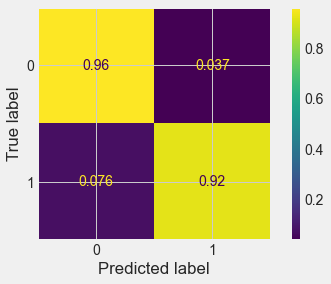

In [472]:
plot_confusion_matrix(pipe_svc, x_train, y_train,normalize= "true")

In [473]:
cross_val_score(pipe_svc, x_train, y_train, scoring= "accuracy", n_jobs= -1, cv= 5).mean()

0.9441763155537293

([0.06091321556134762,
  0.05666570132252148,
  0.057178711628804946,
  0.05731592538069841,
  0.056335308994729424,
  0.05568247634982946,
  0.055271323174515614,
  0.05485369532428356,
  0.05437930368749598,
  0.0535745313435141],
 [0.06607963542270112,
  0.06183138299926621,
  0.0606341482253891,
  0.059784497740702124,
  0.05885760630286178,
  0.057621751052407987,
  0.05603831151276407,
  0.055227281504653766,
  0.05480245626231028,
  0.053836944347893254])

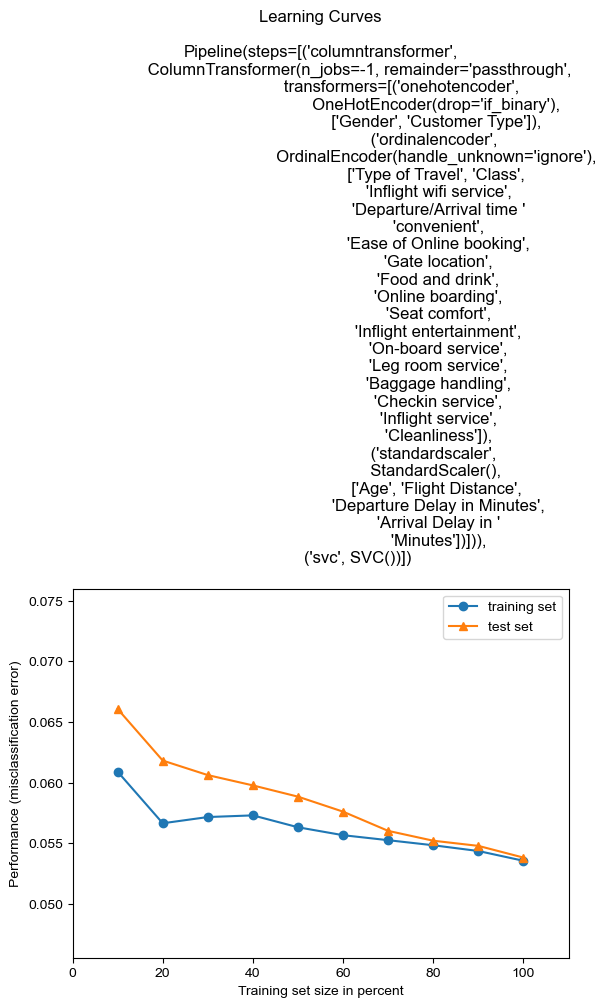

In [503]:
plot_learning_curves(x_train, y_train, x_test, y_test, pipe_svc)

In [500]:
# testing data

pd.DataFrame( classification_report(y_test, pipe_svc.predict(x_test), output_dict= True))

0             1  accuracy     macro avg  weighted avg
precision      0.942938      0.950483  0.946163      0.946711      0.946250
recall         0.962280      0.925561  0.946163      0.943920      0.946163
f1-score       0.952511      0.937857  0.946163      0.945184      0.946079
support    14528.000000  11365.000000  0.946163  25893.000000  25893.000000

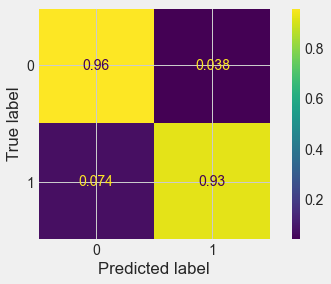

In [505]:
plot_confusion_matrix(pipe_svc, x_test, y_test, normalize = "true")

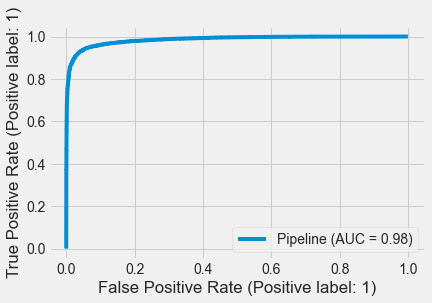

In [507]:
plot_roc_curve(pipe_svc, x_test, y_test)

In [508]:
params_svc = {}
params_svc["svc__kernel"] = ["kernel", "poly", "rbf"]
params_svc["svc__degree"] = [1,2,3]
params_svc["svc__gamma"] = ["scale", "auto"]
params_svc["svc__C"] = [0.1, 0.5, 1]
params_svc["svc__class_weight"] = [None, "balanced"]
params_svc["svc__decision_function_shape"] = ["ovo", "ovr"]

In [509]:
gscv_svc = RandomizedSearchCV(pipe_svc, params_svc, n_iter= 20, cv= kfold, n_jobs= -1, random_state= 42)

In [510]:
gscv_svc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='

In [511]:
gscv_svc.best_score_

0.9446299949568752

In [512]:
gscv_svc.best_params_

{'svc__kernel': 'rbf',
 'svc__gamma': 'scale',
 'svc__degree': 3,
 'svc__decision_function_shape': 'ovr',
 'svc__class_weight': None,
 'svc__C': 1}

In [513]:
pd.DataFrame(gscv_svc.cv_results_)[["rank_test_score", "params", "mean_score_time"]].sort_values("rank_test_score")

rank_test_score                                             params  \
15                1  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...   
6                 2  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', ...   
9                 3  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...   
16                4  {'svc__kernel': 'poly', 'svc__gamma': 'auto', ...   
18                4  {'svc__kernel': 'poly', 'svc__gamma': 'auto', ...   
12                6  {'svc__kernel': 'poly', 'svc__gamma': 'auto', ...   
14                7  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...   
8                 8  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...   
7                 9  {'svc__kernel': 'poly', 'svc__gamma': 'scale',...   
17               10  {'svc__kernel': 'kernel', 'svc__gamma': 'scale...   
13               11  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
0                12  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
10               13  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
5                14  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
4                15  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
3                16  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
2                17  {'svc__kernel': 'kernel', 'svc__gamma': 'scale...   
1                18  {'svc__kernel': 'kernel', 'svc__gamma': 'auto'...   
11               19  {'svc__kernel': 'kernel', 'svc__gamma': 'scale...   
19               20  {'svc__kernel': 'kernel', 'svc__gamma': 'scale...   

    mean_score_time  
15        37.258047  
6         36.535544  
9         10.528891  
16        10.329661  
18         9.024395  
12        11.346058  
14        14.414141  
8         11.009749  
7         18.659050  
17         0.000000  
13         0.000000  
0          0.000000  
10         0.000000  
5          0.000000  
4          0.000000  
3          0.000000  
2          0.000000  
1          0.000000  
11         0.000000  
19         0.000000

In [514]:
# testing Data

testing_svc = pd.DataFrame( classification_report(y_test, gscv_svc.predict(x_test), output_dict= True) )
testing_svc

0             1  accuracy     macro avg  weighted avg
precision      0.942938      0.950483  0.946163      0.946711      0.946250
recall         0.962280      0.925561  0.946163      0.943920      0.946163
f1-score       0.952511      0.937857  0.946163      0.945184      0.946079
support    14528.000000  11365.000000  0.946163  25893.000000  25893.000000

In [515]:
pd.DataFrame( cross_validate(pipe_svc, x_test, y_test, n_jobs= -1, scoring= "accuracy", cv= kfold) )

fit_time  score_time  test_score
0  16.388395    2.594426    0.935658
1  16.571815    2.424633    0.932144
2  16.293821    2.717229    0.937010
3  16.417163    2.571356    0.938902
4  15.949778    2.689416    0.942687
5  17.229720    2.935459    0.938902
6   8.381761    1.979780    0.937821

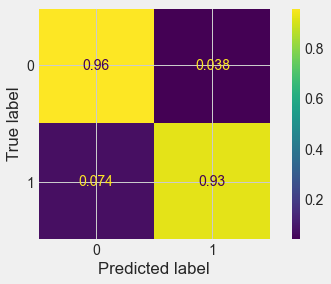

In [517]:
plot_confusion_matrix(pipe_svc, x_test, y_test, normalize = "true")

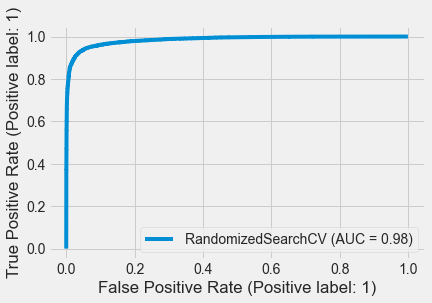

In [519]:
plot_roc_curve(gscv_svc, x_test, y_test)

In [566]:
plot_learning_curves(x_train, y_train, x_test, y_test, gscv_svc)

KeyboardInterrupt: 